In [1]:
#import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
ky_debt_data = pd.read_excel('./data/sw-Debt-in-America-Data.xlsx', sheet_name="sw - Medical Debt - KY - County")
ky_debt_data.head()

,Unnamed: 0,Unnamed: 1,Share with debt in collections,Unnamed: 3,Unnamed: 4,Median debt in collections,Unnamed: 6,Unnamed: 7,Share with medical debt in collections,Unnamed: 9,Unnamed: 10,Median medical debt in collections,Unnamed: 12,Unnamed: 13,Nonwhite population share,Share without health insurance coverage,Unnamed: 16,Unnamed: 17,Average household income,Unnamed: 19,Unnamed: 20
0,County,State,Overall,White areas,Nonwhite areas,Overall,White areas,Nonwhite areas,Overall,White areas,Nonwhite areas,Overall,White areas,Nonwhite areas,NaN,Overall,White,Nonwhite,Overall,White,Nonwhite
1,Adair County,Kentucky,0.41,0.41,n/a**,1636,1636,n/a**,0.29,0.29,n/a**,767,767,n/a**,0.06,0.15,0.14,0.27,45573,45942,38559
2,Allen County,Kentucky,0.41,0.41,n/a**,2198,2198,n/a**,0.35,0.35,n/a**,1200,1200,n/a**,0.04,0.16,0.16,0.28,52779,51598,88920
3,Anderson County,Kentucky,0.32,0.32,n/a**,1119,1119,n/a**,0.24,0.24,n/a**,744,744,n/a**,0.06,0.09,0.09,0.06,61426,61528,58865
4,Ballard County,Kentucky,0.32,0.32,n/a**,n/a*,n/a*,n/a**,0.23,0.23,n/a**,n/a*,n/a*,n/a**,0.07,0.12,0.12,0.21,58182,59729,30831


In [3]:
ky_debt_data = ky_debt_data.iloc[1:,]
ky_debt_data.head()

,Unnamed: 0,Unnamed: 1,Share with debt in collections,Unnamed: 3,Unnamed: 4,Median debt in collections,Unnamed: 6,Unnamed: 7,Share with medical debt in collections,Unnamed: 9,Unnamed: 10,Median medical debt in collections,Unnamed: 12,Unnamed: 13,Nonwhite population share,Share without health insurance coverage,Unnamed: 16,Unnamed: 17,Average household income,Unnamed: 19,Unnamed: 20
1,Adair County,Kentucky,0.41,0.41,n/a**,1636,1636,n/a**,0.29,0.29,n/a**,767,767,n/a**,0.06,0.15,0.14,0.27,45573,45942,38559
2,Allen County,Kentucky,0.41,0.41,n/a**,2198,2198,n/a**,0.35,0.35,n/a**,1200,1200,n/a**,0.04,0.16,0.16,0.28,52779,51598,88920
3,Anderson County,Kentucky,0.32,0.32,n/a**,1119,1119,n/a**,0.24,0.24,n/a**,744,744,n/a**,0.06,0.09,0.09,0.06,61426,61528,58865
4,Ballard County,Kentucky,0.32,0.32,n/a**,n/a*,n/a*,n/a**,0.23,0.23,n/a**,n/a*,n/a*,n/a**,0.07,0.12,0.12,0.21,58182,59729,30831
5,Barren County,Kentucky,0.41,0.41,n/a**,1477,1518,n/a**,0.29,0.29,n/a**,781,776,n/a**,0.09,0.13,0.13,0.15,49555,50043,43486


In [4]:
ky_debt_data = ky_debt_data.reset_index(drop=True)
ky_debt_data.head()

,Unnamed: 0,Unnamed: 1,Share with debt in collections,Unnamed: 3,Unnamed: 4,Median debt in collections,Unnamed: 6,Unnamed: 7,Share with medical debt in collections,Unnamed: 9,Unnamed: 10,Median medical debt in collections,Unnamed: 12,Unnamed: 13,Nonwhite population share,Share without health insurance coverage,Unnamed: 16,Unnamed: 17,Average household income,Unnamed: 19,Unnamed: 20
0,Adair County,Kentucky,0.41,0.41,n/a**,1636,1636,n/a**,0.29,0.29,n/a**,767,767,n/a**,0.06,0.15,0.14,0.27,45573,45942,38559
1,Allen County,Kentucky,0.41,0.41,n/a**,2198,2198,n/a**,0.35,0.35,n/a**,1200,1200,n/a**,0.04,0.16,0.16,0.28,52779,51598,88920
2,Anderson County,Kentucky,0.32,0.32,n/a**,1119,1119,n/a**,0.24,0.24,n/a**,744,744,n/a**,0.06,0.09,0.09,0.06,61426,61528,58865
3,Ballard County,Kentucky,0.32,0.32,n/a**,n/a*,n/a*,n/a**,0.23,0.23,n/a**,n/a*,n/a*,n/a**,0.07,0.12,0.12,0.21,58182,59729,30831
4,Barren County,Kentucky,0.41,0.41,n/a**,1477,1518,n/a**,0.29,0.29,n/a**,781,776,n/a**,0.09,0.13,0.13,0.15,49555,50043,43486


In [5]:
ky_debt_data = ky_debt_data.rename(columns={'Unnamed: 0': 'County', 'Unnamed: 1': 'State', 'Share with debt in collections': 'pct_debt_in_coll', 'Median debt in collections': 'median_debt_in_coll', 'Share with medical debt in collections': 'pct_med_debt_in_coll', 'Median medical debt in collections': 'median_med_debt_in_coll', 'Nonwhite population share': 'pct_pop_nonwhite', 'Share without health insurance coverage': 'pct_overall_no_ins', 'Unnamed: 16': 'pct_white_no_ins', 'Unnamed: 17': 'pct_nonwhite_no_ins', 'Average household income': 'avg_income', 'Unnamed: 19': 'avg_income_white', 'Unnamed: 20': 'avg_income_nonwhite' })
ky_debt_data.head()

,County,State,pct_debt_in_coll,Unnamed: 3,Unnamed: 4,median_debt_in_coll,Unnamed: 6,Unnamed: 7,pct_med_debt_in_coll,Unnamed: 9,Unnamed: 10,median_med_debt_in_coll,Unnamed: 12,Unnamed: 13,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite
0,Adair County,Kentucky,0.41,0.41,n/a**,1636,1636,n/a**,0.29,0.29,n/a**,767,767,n/a**,0.06,0.15,0.14,0.27,45573,45942,38559
1,Allen County,Kentucky,0.41,0.41,n/a**,2198,2198,n/a**,0.35,0.35,n/a**,1200,1200,n/a**,0.04,0.16,0.16,0.28,52779,51598,88920
2,Anderson County,Kentucky,0.32,0.32,n/a**,1119,1119,n/a**,0.24,0.24,n/a**,744,744,n/a**,0.06,0.09,0.09,0.06,61426,61528,58865
3,Ballard County,Kentucky,0.32,0.32,n/a**,n/a*,n/a*,n/a**,0.23,0.23,n/a**,n/a*,n/a*,n/a**,0.07,0.12,0.12,0.21,58182,59729,30831
4,Barren County,Kentucky,0.41,0.41,n/a**,1477,1518,n/a**,0.29,0.29,n/a**,781,776,n/a**,0.09,0.13,0.13,0.15,49555,50043,43486


In [6]:
ky_debt_data = ky_debt_data[ky_debt_data.columns.drop(list(ky_debt_data.filter(regex='Unnamed:')))]
ky_debt_data.head()

,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite
0,Adair County,Kentucky,0.41,1636,0.29,767,0.06,0.15,0.14,0.27,45573,45942,38559
1,Allen County,Kentucky,0.41,2198,0.35,1200,0.04,0.16,0.16,0.28,52779,51598,88920
2,Anderson County,Kentucky,0.32,1119,0.24,744,0.06,0.09,0.09,0.06,61426,61528,58865
3,Ballard County,Kentucky,0.32,n/a*,0.23,n/a*,0.07,0.12,0.12,0.21,58182,59729,30831
4,Barren County,Kentucky,0.41,1477,0.29,781,0.09,0.13,0.13,0.15,49555,50043,43486


In [7]:
ky_debt_data.County = ky_debt_data.County.str[:-7]

In [8]:
ky_debt_data.head()

,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite
0,Adair,Kentucky,0.41,1636,0.29,767,0.06,0.15,0.14,0.27,45573,45942,38559
1,Allen,Kentucky,0.41,2198,0.35,1200,0.04,0.16,0.16,0.28,52779,51598,88920
2,Anderson,Kentucky,0.32,1119,0.24,744,0.06,0.09,0.09,0.06,61426,61528,58865
3,Ballard,Kentucky,0.32,n/a*,0.23,n/a*,0.07,0.12,0.12,0.21,58182,59729,30831
4,Barren,Kentucky,0.41,1477,0.29,781,0.09,0.13,0.13,0.15,49555,50043,43486


Population

In [9]:
ky_county_pop_df = pd.read_excel('./data/Kentucky-counties.xls')
ky_county_pop_df

,"Annual Estimates of the Resident Population for Kentucky, ADDs, and Counties:",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,"April 1, 2010 to July 1, 2018",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Population Change,NaN,NaN,NaN
2,NaN,2010-04-01 00:00:00,Population Estimates (as of July 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census-2018,NaN,2017-2018,NaN
3,NaN,Census,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,Number,Percent,Number,Percent
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Kentucky,4339367,4347948,4368505.0,4383673.0,4399121.0,4410415.0,4422057.0,4436113.0,4454189.0,4468402.0,129035,3,14213,0.3
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ADDs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,BarrenRiver,284195,284940,286732.0,288623.0,291467.0,293377.0,296666.0,299547.0,303348.0,306780.0,22585,7.9,3432,1.1
9,Big Sandy,154093,154612,154158.0,152960.0,151427.0,149709.0,147541.0,144889.0,141728.0,140318.0,-13775,-8.9,-1410,-1


In [10]:
ky_county_pop_df = ky_county_pop_df.iloc[25:145,:]
ky_county_pop_df



,"Annual Estimates of the Resident Population for Kentucky, ADDs, and Counties:",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
25,Adair,18656,18761,18991.0,18937.0,19126.0,19265.0,19168.0,19264.0,19294.0,19215.0,559,3,-79,-0.4
26,Allen,19956,20048,20190.0,20250.0,20333.0,20510.0,20678.0,20738.0,20921.0,21122.0,1166,5.8,201,1
27,Anderson,21421,21457,21551.0,21686.0,21737.0,21853.0,21891.0,22146.0,22518.0,22663.0,1242,5.8,145,0.6
28,Ballard,8249,8260,8269.0,8287.0,8254.0,8189.0,8216.0,8045.0,8021.0,7979.0,-270,-3.3,-42,-0.5
29,Barren,42173,42123,42329.0,42620.0,42952.0,43048.0,43566.0,43794.0,43815.0,44176.0,2003,4.7,361,0.8
30,Bath,11591,11616,11714.0,11781.0,11974.0,12131.0,12201.0,12245.0,12378.0,12383.0,792,6.8,5,0
31,Bell,28691,28709,28657.0,28296.0,28047.0,27847.0,27391.0,27231.0,26904.0,26569.0,-2122,-7.4,-335,-1.2
32,Boone,118811,119379,121545.0,123074.0,124680.0,126330.0,127818.0,129185.0,130611.0,131533.0,12722,10.7,922,0.7
33,Bourbon,19985,19967,20055.0,20061.0,20038.0,20074.0,20182.0,20147.0,20132.0,20184.0,199,1,52,0.3
34,Boyd,49542,49606,49419.0,49255.0,48917.0,48840.0,48506.0,48109.0,47759.0,47240.0,-2302,-4.6,-519,-1.1


In [11]:
ky_county_pop_df = ky_county_pop_df.rename(columns={'Annual Estimates of the Resident Population for Kentucky, ADDs, and Counties:': 'County', 'Unnamed: 9': 'pop_2017'})
ky_county_pop_df.head()

,County,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,pop_2017,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
25,Adair,18656,18761,18991.0,18937.0,19126.0,19265.0,19168.0,19264.0,19294.0,19215.0,559,3,-79,-0.4
26,Allen,19956,20048,20190.0,20250.0,20333.0,20510.0,20678.0,20738.0,20921.0,21122.0,1166,5.8,201,1
27,Anderson,21421,21457,21551.0,21686.0,21737.0,21853.0,21891.0,22146.0,22518.0,22663.0,1242,5.8,145,0.6
28,Ballard,8249,8260,8269.0,8287.0,8254.0,8189.0,8216.0,8045.0,8021.0,7979.0,-270,-3.3,-42,-0.5
29,Barren,42173,42123,42329.0,42620.0,42952.0,43048.0,43566.0,43794.0,43815.0,44176.0,2003,4.7,361,0.8


In [12]:
ky_county_pop_df = ky_county_pop_df[ky_county_pop_df.columns.drop(list(ky_county_pop_df.filter(regex='Unnamed:')))]
ky_county_pop_df = ky_county_pop_df.reset_index(drop=True)
ky_county_pop_df

,County,pop_2017
0,Adair,19294.0
1,Allen,20921.0
2,Anderson,22518.0
3,Ballard,8021.0
4,Barren,43815.0
5,Bath,12378.0
6,Bell,26904.0
7,Boone,130611.0
8,Bourbon,20132.0
9,Boyd,47759.0


In [13]:
ky_debt_pop_df = pd.merge(ky_debt_data,ky_county_pop_df, on=['County'], how ='inner')
ky_debt_pop_df

,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
0,Adair,Kentucky,0.41,1636,0.29,767,0.06,0.15,0.14,0.27,45573,45942,38559,19294.0
1,Allen,Kentucky,0.41,2198,0.35,1200,0.04,0.16,0.16,0.28,52779,51598,88920,20921.0
2,Anderson,Kentucky,0.32,1119,0.24,744,0.06,0.09,0.09,0.06,61426,61528,58865,22518.0
3,Ballard,Kentucky,0.32,n/a*,0.23,n/a*,0.07,0.12,0.12,0.21,58182,59729,30831,8021.0
4,Barren,Kentucky,0.41,1477,0.29,781,0.09,0.13,0.13,0.15,49555,50043,43486,43815.0
5,Bath,Kentucky,0.54,1012,0.44,466,0.04,0.13,0.13,0.2,48853,49679,25529,12378.0
6,Bell,Kentucky,0.56,1030,0.37,545,0.05,0.14,0.14,0.12,32781,33003,28357,26904.0
7,Boone,Kentucky,0.28,1410,0.13,390,0.11,0.06,0.04,0.22,88538,87799,96049,130611.0
8,Bourbon,Kentucky,0.41,1248,0.32,592,0.15,0.13,0.11,0.25,58199,60702,39777,20132.0
9,Boyd,Kentucky,0.52,1708,0.43,790,0.06,0.12,0.11,0.26,63743,62881,88023,47759.0


In [14]:
ky_debt_pop_df.tail()

,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
115,Wayne,Kentucky,0.45,1181,0.34,449,0.06,0.12,0.12,0.14,37361,38327,23224,20621.0
116,Webster,Kentucky,0.35,1398,0.25,603,0.11,0.12,0.12,0.13,51036,51641,43662,13071.0
117,Whitley,Kentucky,0.5,1457,0.34,809,0.04,0.13,0.13,0.2,44278,44328,42161,36129.0
118,Wolfe,Kentucky,0.46,1497,0.26,n/a*,0.02,0.12,0.12,0.27,32719,33046,11829,7245.0
119,Woodford,Kentucky,0.27,1139,0.19,447,0.14,0.09,0.07,0.24,76590,79834,48537,26396.0


In [15]:
ky_debt_pop_df = ky_debt_pop_df.replace('n/a*', np.nan)
ky_debt_pop_df

,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
0,Adair,Kentucky,0.41,1636.0,0.29,767.0,0.06,0.15,0.14,0.27,45573,45942,38559,19294.0
1,Allen,Kentucky,0.41,2198.0,0.35,1200.0,0.04,0.16,0.16,0.28,52779,51598,88920,20921.0
2,Anderson,Kentucky,0.32,1119.0,0.24,744.0,0.06,0.09,0.09,0.06,61426,61528,58865,22518.0
3,Ballard,Kentucky,0.32,NaN,0.23,NaN,0.07,0.12,0.12,0.21,58182,59729,30831,8021.0
4,Barren,Kentucky,0.41,1477.0,0.29,781.0,0.09,0.13,0.13,0.15,49555,50043,43486,43815.0
5,Bath,Kentucky,0.54,1012.0,0.44,466.0,0.04,0.13,0.13,0.20,48853,49679,25529,12378.0
6,Bell,Kentucky,0.56,1030.0,0.37,545.0,0.05,0.14,0.14,0.12,32781,33003,28357,26904.0
7,Boone,Kentucky,0.28,1410.0,0.13,390.0,0.11,0.06,0.04,0.22,88538,87799,96049,130611.0
8,Bourbon,Kentucky,0.41,1248.0,0.32,592.0,0.15,0.13,0.11,0.25,58199,60702,39777,20132.0
9,Boyd,Kentucky,0.52,1708.0,0.43,790.0,0.06,0.12,0.11,0.26,63743,62881,88023,47759.0


In [16]:
ky_debt_pop_df.describe()

,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
count,119.000000,111.000000,119.000000,94.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,0.418151,1344.054054,0.295042,663.872340,0.079250,0.118500,0.112250,0.182750,52205.508333,52947.533333,44823.725000,37115.616667
std,0.082277,364.403269,0.078609,223.145655,0.061167,0.031878,0.033618,0.106794,12223.566846,12781.744995,22819.181598,77775.606185
min,0.220000,713.000000,0.130000,284.000000,0.000000,0.040000,0.040000,0.000000,29120.000000,29257.000000,10089.000000,2132.000000
25%,0.365000,1127.000000,0.240000,509.250000,0.040000,0.110000,0.090000,0.130000,43633.000000,44251.000000,31695.250000,12236.000000
50%,0.410000,1295.000000,0.290000,623.000000,0.060000,0.120000,0.115000,0.175000,50190.500000,51611.000000,41675.500000,19028.000000
75%,0.480000,1490.500000,0.340000,783.250000,0.110000,0.140000,0.132500,0.220000,58200.250000,59041.750000,50468.500000,35603.250000
max,0.610000,2905.000000,0.520000,1644.000000,0.330000,0.200000,0.200000,0.530000,106471.000000,106428.000000,204448.000000,770377.000000


In [17]:
ky_debt_pop_df.median_debt_in_coll = ky_debt_pop_df.median_debt_in_coll.replace(np.nan, 1295)  #replacing all NaN values in median debt collections with the median medical debt in collections for all counties. 
ky_debt_pop_df

,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
0,Adair,Kentucky,0.41,1636.0,0.29,767.0,0.06,0.15,0.14,0.27,45573,45942,38559,19294.0
1,Allen,Kentucky,0.41,2198.0,0.35,1200.0,0.04,0.16,0.16,0.28,52779,51598,88920,20921.0
2,Anderson,Kentucky,0.32,1119.0,0.24,744.0,0.06,0.09,0.09,0.06,61426,61528,58865,22518.0
3,Ballard,Kentucky,0.32,1295.0,0.23,NaN,0.07,0.12,0.12,0.21,58182,59729,30831,8021.0
4,Barren,Kentucky,0.41,1477.0,0.29,781.0,0.09,0.13,0.13,0.15,49555,50043,43486,43815.0
5,Bath,Kentucky,0.54,1012.0,0.44,466.0,0.04,0.13,0.13,0.20,48853,49679,25529,12378.0
6,Bell,Kentucky,0.56,1030.0,0.37,545.0,0.05,0.14,0.14,0.12,32781,33003,28357,26904.0
7,Boone,Kentucky,0.28,1410.0,0.13,390.0,0.11,0.06,0.04,0.22,88538,87799,96049,130611.0
8,Bourbon,Kentucky,0.41,1248.0,0.32,592.0,0.15,0.13,0.11,0.25,58199,60702,39777,20132.0
9,Boyd,Kentucky,0.52,1708.0,0.43,790.0,0.06,0.12,0.11,0.26,63743,62881,88023,47759.0


In [18]:
ky_debt_pop_df.median_med_debt_in_coll = ky_debt_pop_df.median_med_debt_in_coll.replace(np.nan, 623)  #replacing all NaN values in median debt collections with the median medical debt in collections for all counties. 
ky_debt_pop_df

,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
0,Adair,Kentucky,0.41,1636.0,0.29,767.0,0.06,0.15,0.14,0.27,45573,45942,38559,19294.0
1,Allen,Kentucky,0.41,2198.0,0.35,1200.0,0.04,0.16,0.16,0.28,52779,51598,88920,20921.0
2,Anderson,Kentucky,0.32,1119.0,0.24,744.0,0.06,0.09,0.09,0.06,61426,61528,58865,22518.0
3,Ballard,Kentucky,0.32,1295.0,0.23,623.0,0.07,0.12,0.12,0.21,58182,59729,30831,8021.0
4,Barren,Kentucky,0.41,1477.0,0.29,781.0,0.09,0.13,0.13,0.15,49555,50043,43486,43815.0
5,Bath,Kentucky,0.54,1012.0,0.44,466.0,0.04,0.13,0.13,0.20,48853,49679,25529,12378.0
6,Bell,Kentucky,0.56,1030.0,0.37,545.0,0.05,0.14,0.14,0.12,32781,33003,28357,26904.0
7,Boone,Kentucky,0.28,1410.0,0.13,390.0,0.11,0.06,0.04,0.22,88538,87799,96049,130611.0
8,Bourbon,Kentucky,0.41,1248.0,0.32,592.0,0.15,0.13,0.11,0.25,58199,60702,39777,20132.0
9,Boyd,Kentucky,0.52,1708.0,0.43,790.0,0.06,0.12,0.11,0.26,63743,62881,88023,47759.0


Which county had the highest percent of medical debts in collections?

In [19]:
highest_pct_med_debt_coll = ky_debt_pop_df[ky_debt_pop_df.pct_med_debt_in_coll != 'n/a*']
highest_pct_med_debt_coll = highest_pct_med_debt_coll.sort_values(by='pct_med_debt_in_coll', ascending=False)
highest_pct_med_debt_coll.reset_index(drop=True)

//anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
0,Carter,Kentucky,0.58,1422.0,0.52,882.0,0.03,0.15,0.15,0.16,47504,47734,37224,27193.0
1,Johnson,Kentucky,0.55,1184.0,0.46,757.0,0.02,0.11,0.11,0.01,46867,46463,68038,22571.0
2,Elliott,Kentucky,0.51,1295.0,0.45,623.0,0.03,0.12,0.12,0.00,39390,39458,26100,7508.0
3,Bath,Kentucky,0.54,1012.0,0.44,466.0,0.04,0.13,0.13,0.20,48853,49679,25529,12378.0
4,Floyd,Kentucky,0.56,1138.0,0.43,533.0,0.03,0.14,0.14,0.29,44358,44020,63962,36261.0
5,Menifee,Kentucky,0.55,1488.0,0.43,623.0,0.04,0.14,0.12,0.52,41120,41613,10089,6466.0
6,Cumberland,Kentucky,0.46,1087.0,0.43,580.0,0.05,0.18,0.18,0.16,41349,41631,34492,6696.0
7,Nicholas,Kentucky,0.58,1691.0,0.43,623.0,0.04,0.16,0.16,0.00,48510,49383,16041,7137.0
8,Boyd,Kentucky,0.52,1708.0,0.43,790.0,0.06,0.12,0.11,0.26,63743,62881,88023,47759.0
9,Greenup,Kentucky,0.49,1681.0,0.43,875.0,0.04,0.13,0.12,0.17,59689,59434,67530,35491.0


Which county had the lowest percent of medical debts in collections?

In [20]:
#lowest_pct_med_debt_coll = ky_debt_pop_df[ky_debt_pop_df.pct_med_debt_in_coll != 'n/a*']
lowest_pct_med_debt_coll = ky_debt_pop_df.sort_values(by='pct_med_debt_in_coll', ascending=True)
lowest_pct_med_debt_coll.reset_index(drop=True)

,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
0,Marshall,Kentucky,0.22,1232.0,0.13,480.0,0.03,0.08,0.08,0.18,56956,57443,31082,31311.0
1,Carlisle,Kentucky,0.24,1295.0,0.13,623.0,0.05,0.14,0.12,0.53,51628,51624,51765,4828.0
2,Boone,Kentucky,0.28,1410.0,0.13,390.0,0.11,0.06,0.04,0.22,88538,87799,96049,130611.0
3,Kenton,Kentucky,0.32,1238.0,0.15,495.0,0.11,0.06,0.04,0.15,70839,72990,47309,165410.0
4,Campbell,Kentucky,0.32,1099.0,0.15,519.0,0.07,0.07,0.06,0.16,74290,75928,45680,92547.0
5,Calloway,Kentucky,0.28,922.0,0.16,680.0,0.10,0.11,0.10,0.20,50310,52599,27634,38865.0
6,Hickman,Kentucky,0.28,1295.0,0.18,623.0,0.12,0.14,0.14,0.13,44888,46004,33568,4523.0
7,McCracken,Kentucky,0.37,1111.0,0.18,550.0,0.16,0.05,0.05,0.05,87060,88321,79664,65397.0
8,Oldham,Kentucky,0.25,1390.0,0.18,634.0,0.11,0.05,0.04,0.15,106471,106428,106964,66489.0
9,Livingston,Kentucky,0.38,1342.0,0.19,623.0,0.04,0.09,0.09,0.11,55685,55159,76568,9264.0


Which county had the highest median medical debt amount in collections?

In [21]:
highest_median_med_debt_coll = ky_debt_pop_df[ky_debt_pop_df.median_med_debt_in_coll != 'n/a*']
highest_median_med_debt_coll = highest_median_med_debt_coll.sort_values(by='median_med_debt_in_coll', ascending=False)
highest_median_med_debt_coll.reset_index(drop=True)

//anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
0,Union,Kentucky,0.37,2670.0,0.27,1644.0,0.17,0.14,0.10,0.33,51971,54102,29859,14640.0
1,Henderson,Kentucky,0.39,1845.0,0.28,1316.0,0.13,0.11,0.10,0.17,54572,56395,38329,45989.0
2,Simpson,Kentucky,0.43,1700.0,0.33,1249.0,0.15,0.13,0.11,0.22,49851,52784,31009,18105.0
3,Allen,Kentucky,0.41,2198.0,0.35,1200.0,0.04,0.16,0.16,0.28,52779,51598,88920,20921.0
4,Washington,Kentucky,0.39,1249.0,0.30,991.0,0.12,0.11,0.09,0.21,49984,51568,34939,11939.0
5,Rockcastle,Kentucky,0.52,1564.0,0.43,963.0,0.02,0.11,0.11,0.11,42287,42499,31704,16757.0
6,Harrison,Kentucky,0.36,2007.0,0.28,945.0,0.06,0.15,0.14,0.31,50510,51707,26113,18730.0
7,Mercer,Kentucky,0.36,1594.0,0.27,923.0,0.08,0.11,0.10,0.19,54503,55269,41636,21588.0
8,Powell,Kentucky,0.54,1449.0,0.34,923.0,0.03,0.13,0.13,0.14,43275,43739,28999,12321.0
9,Christian,Kentucky,0.49,1542.0,0.34,912.0,0.33,0.08,0.07,0.09,45909,48824,38634,71252.0


Which county had the highest median medical debt amount in collections?

In [22]:
lowest_median_med_debt_coll = ky_debt_pop_df[ky_debt_pop_df.median_med_debt_in_coll != 'n/a*']
lowest_median_med_debt_coll = lowest_median_med_debt_coll.sort_values(by='median_med_debt_in_coll', ascending=True)
lowest_median_med_debt_coll.reset_index(drop=True)

//anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
0,Spencer,Kentucky,0.26,713.0,0.19,284.0,0.05,0.07,0.06,0.22,73839,74452,58976,18471.0
1,Boyle,Kentucky,0.40,1208.0,0.23,321.0,0.14,0.11,0.09,0.18,56462,57554,47549,29958.0
2,Monroe,Kentucky,0.50,857.0,0.37,344.0,0.06,0.11,0.09,0.30,42684,43048,35863,10611.0
3,Hopkins,Kentucky,0.34,1135.0,0.21,363.0,0.11,0.12,0.11,0.21,54317,55620,40128,45369.0
4,Morgan,Kentucky,0.47,1761.0,0.34,369.0,0.06,0.11,0.11,0.10,43026,43024,43087,13211.0
5,Boone,Kentucky,0.28,1410.0,0.13,390.0,0.11,0.06,0.04,0.22,88538,87799,96049,130611.0
6,Grant,Kentucky,0.40,1169.0,0.24,406.0,0.06,0.11,0.11,0.17,55470,55160,63713,25000.0
7,Lewis,Kentucky,0.50,1312.0,0.38,427.0,0.02,0.15,0.15,0.09,41755,41942,24929,13358.0
8,Clay,Kentucky,0.49,1055.0,0.31,430.0,0.07,0.11,0.11,0.10,34745,34795,31669,20273.0
9,Pike,Kentucky,0.47,1337.0,0.35,433.0,0.03,0.06,0.06,0.22,50797,46338,204448,58862.0


In [23]:
ky_debt_pop_df_drop_robertson = ky_debt_pop_df.drop([ky_debt_pop_df.index[100]])
ky_debt_pop_df_drop_robertson.reset_index(drop=True)

,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
0,Adair,Kentucky,0.41,1636.0,0.29,767.0,0.06,0.15,0.14,0.27,45573,45942,38559,19294.0
1,Allen,Kentucky,0.41,2198.0,0.35,1200.0,0.04,0.16,0.16,0.28,52779,51598,88920,20921.0
2,Anderson,Kentucky,0.32,1119.0,0.24,744.0,0.06,0.09,0.09,0.06,61426,61528,58865,22518.0
3,Ballard,Kentucky,0.32,1295.0,0.23,623.0,0.07,0.12,0.12,0.21,58182,59729,30831,8021.0
4,Barren,Kentucky,0.41,1477.0,0.29,781.0,0.09,0.13,0.13,0.15,49555,50043,43486,43815.0
5,Bath,Kentucky,0.54,1012.0,0.44,466.0,0.04,0.13,0.13,0.20,48853,49679,25529,12378.0
6,Bell,Kentucky,0.56,1030.0,0.37,545.0,0.05,0.14,0.14,0.12,32781,33003,28357,26904.0
7,Boone,Kentucky,0.28,1410.0,0.13,390.0,0.11,0.06,0.04,0.22,88538,87799,96049,130611.0
8,Bourbon,Kentucky,0.41,1248.0,0.32,592.0,0.15,0.13,0.11,0.25,58199,60702,39777,20132.0
9,Boyd,Kentucky,0.52,1708.0,0.43,790.0,0.06,0.12,0.11,0.26,63743,62881,88023,47759.0


Text(0.5, 1.0, 'Percent of medical debt in collections vs average income')

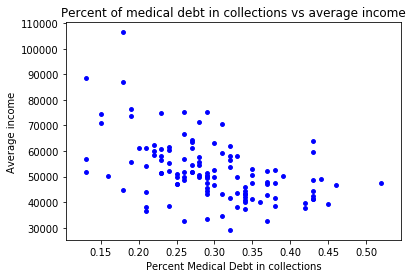

In [24]:
plt.scatter(ky_debt_pop_df_drop_robertson['pct_med_debt_in_coll'], ky_debt_pop_df_drop_robertson['avg_income'], color = "blue", s= 15)
plt.ylabel('Average income')
plt.xlabel('Percent Medical Debt in collections')
plt.title('Percent of medical debt in collections vs average income')

Text(0.5, 1.0, 'Percent of medical debt in collections vs population size')

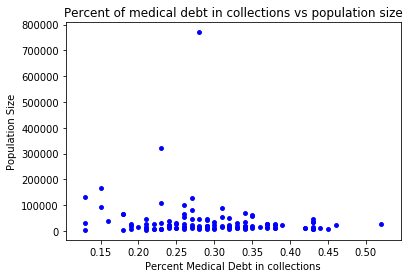

In [25]:
plt.scatter(ky_debt_pop_df_drop_robertson['pct_med_debt_in_coll'], ky_debt_pop_df_drop_robertson['pop_2017'], color = "blue", s= 15)
plt.ylabel('Population Size')
plt.xlabel('Percent Medical Debt in collections')
plt.title('Percent of medical debt in collections vs population size')

In [26]:
ky_debt_pop_drop_median_na_df = ky_debt_pop_df[ky_debt_pop_df.median_med_debt_in_coll != 'n/a*']

//anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Text(0.5, 1.0, 'Median medical debt in collections vs average income')

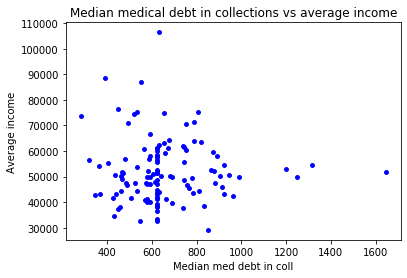

In [27]:
plt.scatter(ky_debt_pop_drop_median_na_df['median_med_debt_in_coll'], ky_debt_pop_drop_median_na_df['avg_income'], color = "blue", s= 15)
plt.ylabel('Average income')
plt.xlabel('Median med debt in coll')
plt.title('Median medical debt in collections vs average income')

Text(0.5, 1.0, 'Median medical debt in collections vs population size')

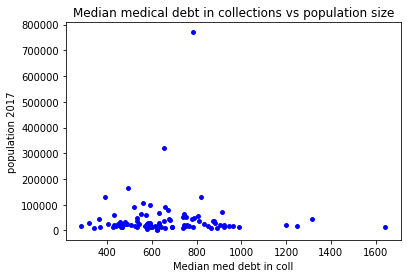

In [28]:
plt.scatter(ky_debt_pop_drop_median_na_df['median_med_debt_in_coll'], ky_debt_pop_drop_median_na_df['pop_2017'], color = "blue", s= 15)
plt.ylabel('population 2017')
plt.xlabel('Median med debt in coll')
plt.title('Median medical debt in collections vs population size')

Text(0.5, 1.0, 'Median medical debt in collections vs population size')

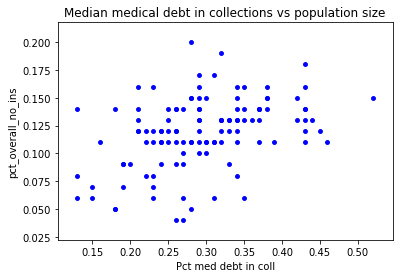

In [29]:
plt.scatter(ky_debt_pop_df_drop_robertson['pct_med_debt_in_coll'], ky_debt_pop_df_drop_robertson['pct_overall_no_ins'], color = "blue", s= 15)
plt.ylabel('pct_overall_no_ins')
plt.xlabel('Pct med debt in coll')
plt.title('Median medical debt in collections vs population size')

In [30]:
ky_debt_pop_df.corr()

,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
pct_debt_in_coll,1.000000,0.029368,0.851569,0.067054,-0.221773,0.410407,0.427120,-0.002681,-0.594502,-0.589172,-0.193039,-0.123937
median_debt_in_coll,0.029368,1.000000,0.142806,0.550724,0.085427,0.075616,0.046906,-0.005924,0.034168,0.031139,0.023437,0.000754
pct_med_debt_in_coll,0.851569,0.142806,1.000000,0.165521,-0.232405,0.410405,0.426256,0.002778,-0.477829,-0.475491,-0.173591,-0.135067
median_med_debt_in_coll,0.067054,0.550724,0.165521,1.000000,0.217339,0.075282,0.006534,0.096891,-0.031087,-0.007349,-0.121843,0.036312
pct_pop_nonwhite,-0.221773,0.085427,-0.232405,0.217339,1.000000,-0.306134,-0.404150,-0.069149,0.410420,0.478296,0.035055,0.532424
pct_overall_no_ins,0.410407,0.075616,0.410405,0.075282,-0.306134,1.000000,0.966078,0.284592,-0.586242,-0.586031,-0.348389,-0.428999
pct_white_no_ins,0.427120,0.046906,0.426256,0.006534,-0.404150,0.966078,1.000000,0.128868,-0.633154,-0.641367,-0.324650,-0.446232
pct_nonwhite_no_ins,-0.002681,-0.005924,0.002778,0.096891,-0.069149,0.284592,0.128868,1.000000,-0.082644,-0.084072,-0.017926,-0.157560
avg_income,-0.594502,0.034168,-0.477829,-0.031087,0.410420,-0.586242,-0.633154,-0.082644,1.000000,0.994229,0.454330,0.375411
avg_income_white,-0.589172,0.031139,-0.475491,-0.007349,0.478296,-0.586031,-0.641367,-0.084072,0.994229,1.000000,0.393820,0.425875


In [31]:
ky_debt_pop_df.dtypes

County                      object
State                       object
pct_debt_in_coll           float64
median_debt_in_coll        float64
pct_med_debt_in_coll       float64
median_med_debt_in_coll    float64
pct_pop_nonwhite           float64
pct_overall_no_ins         float64
pct_white_no_ins           float64
pct_nonwhite_no_ins        float64
avg_income                   int64
avg_income_white             int64
avg_income_nonwhite          int64
pop_2017                   float64
dtype: object

In [32]:
ky_debt_pop_df_drop_robertson.pct_debt_in_coll = pd.to_numeric(ky_debt_pop_df_drop_robertson.pct_debt_in_coll)

In [33]:
ky_debt_pop_drop_median_na_df.median_debt_in_coll = pd.to_numeric(ky_debt_pop_drop_median_na_df.median_debt_in_coll)
ky_debt_pop_drop_median_na_df


,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
0,Adair,Kentucky,0.41,1636.0,0.29,767.0,0.06,0.15,0.14,0.27,45573,45942,38559,19294.0
1,Allen,Kentucky,0.41,2198.0,0.35,1200.0,0.04,0.16,0.16,0.28,52779,51598,88920,20921.0
2,Anderson,Kentucky,0.32,1119.0,0.24,744.0,0.06,0.09,0.09,0.06,61426,61528,58865,22518.0
3,Ballard,Kentucky,0.32,1295.0,0.23,623.0,0.07,0.12,0.12,0.21,58182,59729,30831,8021.0
4,Barren,Kentucky,0.41,1477.0,0.29,781.0,0.09,0.13,0.13,0.15,49555,50043,43486,43815.0
5,Bath,Kentucky,0.54,1012.0,0.44,466.0,0.04,0.13,0.13,0.20,48853,49679,25529,12378.0
6,Bell,Kentucky,0.56,1030.0,0.37,545.0,0.05,0.14,0.14,0.12,32781,33003,28357,26904.0
7,Boone,Kentucky,0.28,1410.0,0.13,390.0,0.11,0.06,0.04,0.22,88538,87799,96049,130611.0
8,Bourbon,Kentucky,0.41,1248.0,0.32,592.0,0.15,0.13,0.11,0.25,58199,60702,39777,20132.0
9,Boyd,Kentucky,0.52,1708.0,0.43,790.0,0.06,0.12,0.11,0.26,63743,62881,88023,47759.0


In [34]:
ky_debt_pop_df_drop_robertson.pct_med_debt_in_coll = pd.to_numeric(ky_debt_pop_df_drop_robertson.pct_med_debt_in_coll)
ky_debt_pop_df_drop_robertson

,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
0,Adair,Kentucky,0.41,1636.0,0.29,767.0,0.06,0.15,0.14,0.27,45573,45942,38559,19294.0
1,Allen,Kentucky,0.41,2198.0,0.35,1200.0,0.04,0.16,0.16,0.28,52779,51598,88920,20921.0
2,Anderson,Kentucky,0.32,1119.0,0.24,744.0,0.06,0.09,0.09,0.06,61426,61528,58865,22518.0
3,Ballard,Kentucky,0.32,1295.0,0.23,623.0,0.07,0.12,0.12,0.21,58182,59729,30831,8021.0
4,Barren,Kentucky,0.41,1477.0,0.29,781.0,0.09,0.13,0.13,0.15,49555,50043,43486,43815.0
5,Bath,Kentucky,0.54,1012.0,0.44,466.0,0.04,0.13,0.13,0.20,48853,49679,25529,12378.0
6,Bell,Kentucky,0.56,1030.0,0.37,545.0,0.05,0.14,0.14,0.12,32781,33003,28357,26904.0
7,Boone,Kentucky,0.28,1410.0,0.13,390.0,0.11,0.06,0.04,0.22,88538,87799,96049,130611.0
8,Bourbon,Kentucky,0.41,1248.0,0.32,592.0,0.15,0.13,0.11,0.25,58199,60702,39777,20132.0
9,Boyd,Kentucky,0.52,1708.0,0.43,790.0,0.06,0.12,0.11,0.26,63743,62881,88023,47759.0


In [35]:
ky_debt_pop_df_drop_robertson_and_median_na = ky_debt_pop_df_drop_robertson[ky_debt_pop_df_drop_robertson.median_med_debt_in_coll != 'n/a*']
ky_debt_pop_df_drop_robertson_and_median_na

,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
0,Adair,Kentucky,0.41,1636.0,0.29,767.0,0.06,0.15,0.14,0.27,45573,45942,38559,19294.0
1,Allen,Kentucky,0.41,2198.0,0.35,1200.0,0.04,0.16,0.16,0.28,52779,51598,88920,20921.0
2,Anderson,Kentucky,0.32,1119.0,0.24,744.0,0.06,0.09,0.09,0.06,61426,61528,58865,22518.0
3,Ballard,Kentucky,0.32,1295.0,0.23,623.0,0.07,0.12,0.12,0.21,58182,59729,30831,8021.0
4,Barren,Kentucky,0.41,1477.0,0.29,781.0,0.09,0.13,0.13,0.15,49555,50043,43486,43815.0
5,Bath,Kentucky,0.54,1012.0,0.44,466.0,0.04,0.13,0.13,0.20,48853,49679,25529,12378.0
6,Bell,Kentucky,0.56,1030.0,0.37,545.0,0.05,0.14,0.14,0.12,32781,33003,28357,26904.0
7,Boone,Kentucky,0.28,1410.0,0.13,390.0,0.11,0.06,0.04,0.22,88538,87799,96049,130611.0
8,Bourbon,Kentucky,0.41,1248.0,0.32,592.0,0.15,0.13,0.11,0.25,58199,60702,39777,20132.0
9,Boyd,Kentucky,0.52,1708.0,0.43,790.0,0.06,0.12,0.11,0.26,63743,62881,88023,47759.0


In [36]:
ky_debt_pop_df_drop_robertson_and_median_na.median_med_debt_in_coll = pd.to_numeric(ky_debt_pop_df_drop_robertson_and_median_na.median_med_debt_in_coll)

In [37]:
ky_debt_pop_df_drop_robertson_and_median_na.pct_overall_no_ins  = pd.to_numeric(ky_debt_pop_df_drop_robertson_and_median_na.pct_overall_no_ins)

In [38]:
ky_debt_pop_df_drop_robertson_and_median_na.pct_nonwhite_no_ins  = pd.to_numeric(ky_debt_pop_df_drop_robertson_and_median_na.pct_nonwhite_no_ins)

In [39]:
ky_debt_pop_df_drop_robertson_and_median_na.avg_income = pd.to_numeric(ky_debt_pop_df_drop_robertson_and_median_na.avg_income)

In [40]:
ky_debt_pop_df_drop_robertson_and_median_na.pop_2017 = pd.to_numeric(ky_debt_pop_df_drop_robertson_and_median_na.pop_2017)

In [41]:
ky_debt_pop_df_drop_robertson_and_median_na.avg_income_nonwhite = pd.to_numeric(ky_debt_pop_df_drop_robertson_and_median_na.avg_income_nonwhite)

In [42]:
ky_debt_pop_df_drop_robertson_and_median_na.dtypes

County                      object
State                       object
pct_debt_in_coll           float64
median_debt_in_coll        float64
pct_med_debt_in_coll       float64
median_med_debt_in_coll    float64
pct_pop_nonwhite           float64
pct_overall_no_ins         float64
pct_white_no_ins           float64
pct_nonwhite_no_ins        float64
avg_income                   int64
avg_income_white             int64
avg_income_nonwhite          int64
pop_2017                   float64
dtype: object

In [43]:
ky_debt_pop_df_drop_robertson_and_median_na.reset_index(drop=True)

,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
0,Adair,Kentucky,0.41,1636.0,0.29,767.0,0.06,0.15,0.14,0.27,45573,45942,38559,19294.0
1,Allen,Kentucky,0.41,2198.0,0.35,1200.0,0.04,0.16,0.16,0.28,52779,51598,88920,20921.0
2,Anderson,Kentucky,0.32,1119.0,0.24,744.0,0.06,0.09,0.09,0.06,61426,61528,58865,22518.0
3,Ballard,Kentucky,0.32,1295.0,0.23,623.0,0.07,0.12,0.12,0.21,58182,59729,30831,8021.0
4,Barren,Kentucky,0.41,1477.0,0.29,781.0,0.09,0.13,0.13,0.15,49555,50043,43486,43815.0
5,Bath,Kentucky,0.54,1012.0,0.44,466.0,0.04,0.13,0.13,0.20,48853,49679,25529,12378.0
6,Bell,Kentucky,0.56,1030.0,0.37,545.0,0.05,0.14,0.14,0.12,32781,33003,28357,26904.0
7,Boone,Kentucky,0.28,1410.0,0.13,390.0,0.11,0.06,0.04,0.22,88538,87799,96049,130611.0
8,Bourbon,Kentucky,0.41,1248.0,0.32,592.0,0.15,0.13,0.11,0.25,58199,60702,39777,20132.0
9,Boyd,Kentucky,0.52,1708.0,0.43,790.0,0.06,0.12,0.11,0.26,63743,62881,88023,47759.0


In [44]:
ky_debt_pop_df_drop_robertson_and_median_na.corr()

,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
pct_debt_in_coll,1.000000,0.029368,0.851569,0.067054,-0.221773,0.410407,0.427120,-0.002681,-0.594502,-0.589172,-0.193039,-0.123937
median_debt_in_coll,0.029368,1.000000,0.142806,0.550647,0.084652,0.074895,0.046269,-0.007900,0.033477,0.030423,0.022466,0.000260
pct_med_debt_in_coll,0.851569,0.142806,1.000000,0.165521,-0.232405,0.410405,0.426256,0.002778,-0.477829,-0.475491,-0.173591,-0.135067
median_med_debt_in_coll,0.067054,0.550647,0.165521,1.000000,0.216994,0.074317,0.005638,0.095752,-0.032108,-0.008348,-0.123676,0.035731
pct_pop_nonwhite,-0.221773,0.084652,-0.232405,0.216994,1.000000,-0.317512,-0.413516,-0.087122,0.406800,0.475047,0.026008,0.531456
pct_overall_no_ins,0.410407,0.074895,0.410405,0.074317,-0.317512,1.000000,0.966130,0.275998,-0.594733,-0.594752,-0.358363,-0.434251
pct_white_no_ins,0.427120,0.046269,0.426256,0.005638,-0.413516,0.966130,1.000000,0.121004,-0.639542,-0.647984,-0.332018,-0.449976
pct_nonwhite_no_ins,-0.002681,-0.007900,0.002778,0.095752,-0.087122,0.275998,0.121004,1.000000,-0.094078,-0.095844,-0.032503,-0.166300
avg_income,-0.594502,0.033477,-0.477829,-0.032108,0.406800,-0.594733,-0.639542,-0.094078,1.000000,0.994206,0.451347,0.373848
avg_income_white,-0.589172,0.030423,-0.475491,-0.008348,0.475047,-0.594752,-0.647984,-0.095844,0.994206,1.000000,0.390349,0.424433


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20e6bbe0>]],
      dtype=object)

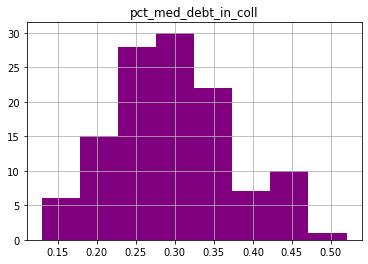

In [45]:
ky_debt_pop_df_drop_robertson_and_median_na.hist(column='pct_med_debt_in_coll',bins=8, color='Purple')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2110d198>]],
      dtype=object)

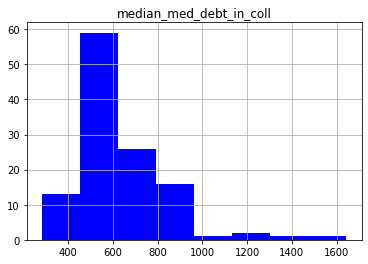

In [46]:
ky_debt_pop_df_drop_robertson_and_median_na.hist(column='median_med_debt_in_coll',bins=8, color='Blue')

In [47]:
ky_debt_pop_df_drop_robertson_and_median_na.avg_income.describe()

count       119.000000
mean      52276.840336
std       12250.145108
min       29120.000000
25%       43641.500000
50%       50310.000000
75%       58201.500000
max      106471.000000
Name: avg_income, dtype: float64

In [48]:
bottom_income_ky_debt_pop_df = ky_debt_pop_df_drop_robertson_and_median_na.loc[ky_debt_pop_df_drop_robertson_and_median_na.avg_income < 44399]
bottom_income_ky_debt_pop_df.reset_index(drop=True)

,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
0,Bell,Kentucky,0.56,1030.0,0.37,545.0,0.05,0.14,0.14,0.12,32781,33003,28357,26904.0
1,Breathitt,Kentucky,0.45,916.0,0.21,623.0,0.03,0.13,0.13,0.19,38128,37539,66710,12931.0
2,Butler,Kentucky,0.43,1249.0,0.33,784.0,0.04,0.12,0.11,0.44,43381,43865,30412,12798.0
3,Casey,Kentucky,0.45,787.0,0.31,438.0,0.05,0.17,0.16,0.28,43192,43325,39354,15794.0
4,Clay,Kentucky,0.49,1055.0,0.31,430.0,0.07,0.11,0.11,0.10,34745,34795,31669,20273.0
5,Clinton,Kentucky,0.44,1031.0,0.35,661.0,0.04,0.13,0.13,0.16,41050,41239,27179,10239.0
6,Cumberland,Kentucky,0.46,1087.0,0.43,580.0,0.05,0.18,0.18,0.16,41349,41631,34492,6696.0
7,Elliott,Kentucky,0.51,1295.0,0.45,623.0,0.03,0.12,0.12,0.00,39390,39458,26100,7508.0
8,Estill,Kentucky,0.50,1108.0,0.36,591.0,0.02,0.13,0.13,0.16,40072,40166,36319,14227.0
9,Floyd,Kentucky,0.56,1138.0,0.43,533.0,0.03,0.14,0.14,0.29,44358,44020,63962,36261.0


In [49]:
bottom_income_ky_debt_pop_df.corr()

,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
pct_debt_in_coll,1.000000,0.219907,0.636420,0.193360,0.038583,-0.156724,-0.154578,0.030757,-0.145758,-0.136765,-0.029318,0.142700
median_debt_in_coll,0.219907,1.000000,0.254566,0.339693,-0.066860,-0.036168,0.019982,-0.126249,-0.034700,-0.053900,-0.238936,-0.057925
pct_med_debt_in_coll,0.636420,0.254566,1.000000,0.097950,-0.076048,0.138732,0.073140,0.131193,0.216508,0.204058,-0.063410,0.073854
median_med_debt_in_coll,0.193360,0.339693,0.097950,1.000000,-0.017167,-0.048885,-0.035311,0.050803,-0.040401,-0.033250,-0.167069,-0.009457
pct_pop_nonwhite,0.038583,-0.066860,-0.076048,-0.017167,1.000000,0.060257,-0.045787,0.008145,0.023828,0.174764,-0.022507,-0.095089
pct_overall_no_ins,-0.156724,-0.036168,0.138732,-0.048885,0.060257,1.000000,0.936435,0.123377,0.227463,0.235338,0.024974,-0.026440
pct_white_no_ins,-0.154578,0.019982,0.073140,-0.035311,-0.045787,0.936435,1.000000,-0.101303,0.187685,0.178884,0.090377,0.032519
pct_nonwhite_no_ins,0.030757,-0.126249,0.131193,0.050803,0.008145,0.123377,-0.101303,1.000000,0.137659,0.144832,0.040061,-0.040969
avg_income,-0.145758,-0.034700,0.216508,-0.040401,0.023828,0.227463,0.187685,0.137659,1.000000,0.984164,0.380433,0.112898
avg_income_white,-0.136765,-0.053900,0.204058,-0.033250,0.174764,0.235338,0.178884,0.144832,0.984164,1.000000,0.313380,0.060029


In [50]:
middle_income_ky_debt_pop_df = ky_debt_pop_df_drop_robertson_and_median_na[(ky_debt_pop_df_drop_robertson_and_median_na.avg_income > 44399) & (ky_debt_pop_df_drop_robertson_and_median_na.avg_income < 59645)]
middle_income_ky_debt_pop_df.reset_index(drop=True)


,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
0,Adair,Kentucky,0.41,1636.0,0.29,767.0,0.06,0.15,0.14,0.27,45573,45942,38559,19294.0
1,Allen,Kentucky,0.41,2198.0,0.35,1200.0,0.04,0.16,0.16,0.28,52779,51598,88920,20921.0
2,Ballard,Kentucky,0.32,1295.0,0.23,623.0,0.07,0.12,0.12,0.21,58182,59729,30831,8021.0
3,Barren,Kentucky,0.41,1477.0,0.29,781.0,0.09,0.13,0.13,0.15,49555,50043,43486,43815.0
4,Bath,Kentucky,0.54,1012.0,0.44,466.0,0.04,0.13,0.13,0.20,48853,49679,25529,12378.0
5,Bourbon,Kentucky,0.41,1248.0,0.32,592.0,0.15,0.13,0.11,0.25,58199,60702,39777,20132.0
6,Boyle,Kentucky,0.40,1208.0,0.23,321.0,0.14,0.11,0.09,0.18,56462,57554,47549,29958.0
7,Bracken,Kentucky,0.34,1727.0,0.23,623.0,0.02,0.08,0.08,0.22,51316,51247,64565,8277.0
8,Breckinridge,Kentucky,0.42,1333.0,0.29,472.0,0.05,0.13,0.13,0.13,51480,52233,35690,20151.0
9,Caldwell,Kentucky,0.41,1677.0,0.29,642.0,0.09,0.11,0.11,0.16,50042,50592,42999,12677.0


In [51]:
middle_income_ky_debt_pop_df.corr()

,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
pct_debt_in_coll,1.000000,-0.013632,0.878176,0.009506,-0.040847,0.224586,0.224216,-0.192436,-0.329095,-0.337733,0.092979,0.119637
median_debt_in_coll,-0.013632,1.000000,0.087609,0.568250,0.147903,0.088899,0.027610,0.016964,0.127401,0.144156,-0.001426,-0.034939
pct_med_debt_in_coll,0.878176,0.087609,1.000000,0.125056,-0.074986,0.209482,0.254847,-0.289120,-0.306927,-0.305579,0.023297,0.082535
median_med_debt_in_coll,0.009506,0.568250,0.125056,1.000000,0.390019,0.059420,-0.079650,0.163554,-0.003790,0.104640,-0.179630,0.012470
pct_pop_nonwhite,-0.040847,0.147903,-0.074986,0.390019,1.000000,-0.068696,-0.208153,-0.000374,-0.019995,0.165612,-0.243647,0.309591
pct_overall_no_ins,0.224586,0.088899,0.209482,0.059420,-0.068696,1.000000,0.946396,0.181709,-0.317777,-0.269601,-0.279483,-0.360056
pct_white_no_ins,0.224216,0.027610,0.254847,-0.079650,-0.208153,0.946396,1.000000,-0.037924,-0.366117,-0.349245,-0.212984,-0.343644
pct_nonwhite_no_ins,-0.192436,0.016964,-0.289120,0.163554,-0.000374,0.181709,-0.037924,1.000000,0.080478,0.079396,0.006406,-0.168982
avg_income,-0.329095,0.127401,-0.306927,-0.003790,-0.019995,-0.317777,-0.366117,0.080478,1.000000,0.961453,0.002157,-0.033918
avg_income_white,-0.337733,0.144156,-0.305579,0.104640,0.165612,-0.269601,-0.349245,0.079396,0.961453,1.000000,-0.219971,-0.041124


In [52]:
top_income_ky_debt_pop_df = ky_debt_pop_df_drop_robertson_and_median_na.loc[ky_debt_pop_df_drop_robertson_and_median_na.avg_income > 59545]
top_income_ky_debt_pop_df.reset_index(drop=True)



,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
0,Anderson,Kentucky,0.32,1119.0,0.24,744.0,0.06,0.09,0.09,0.06,61426,61528,58865,22518.0
1,Boone,Kentucky,0.28,1410.0,0.13,390.0,0.11,0.06,0.04,0.22,88538,87799,96049,130611.0
2,Boyd,Kentucky,0.52,1708.0,0.43,790.0,0.06,0.12,0.11,0.26,63743,62881,88023,47759.0
3,Bullitt,Kentucky,0.36,1320.0,0.27,674.0,0.05,0.04,0.04,0.00,61222,61678,49566,80284.0
4,Campbell,Kentucky,0.32,1099.0,0.15,519.0,0.07,0.07,0.06,0.16,74290,75928,45680,92547.0
5,Clark,Kentucky,0.41,1363.0,0.30,656.0,0.10,0.11,0.11,0.17,63223,64307,50452,35940.0
6,Daviess,Kentucky,0.33,1444.0,0.26,593.0,0.11,0.04,0.04,0.10,66638,68659,44501,100546.0
7,Fayette,Kentucky,0.37,1182.0,0.23,655.0,0.28,0.07,0.05,0.13,74766,83179,48549,322193.0
8,Franklin,Kentucky,0.42,1605.0,0.32,741.0,0.18,0.11,0.09,0.16,61784,64131,47445,50504.0
9,Greenup,Kentucky,0.49,1681.0,0.43,875.0,0.04,0.13,0.12,0.17,59689,59434,67530,35491.0


In [53]:
top_income_ky_debt_pop_df.corr()

,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
pct_debt_in_coll,1.000000,0.548329,0.862855,0.693507,0.083553,0.383795,0.373419,0.011847,-0.490068,-0.455324,-0.100836,0.103378
median_debt_in_coll,0.548329,1.000000,0.559993,0.692726,0.063198,0.232255,0.238188,0.094509,-0.192388,-0.220930,0.200819,0.058874
pct_med_debt_in_coll,0.862855,0.559993,1.000000,0.716606,-0.044814,0.433228,0.407510,0.180820,-0.463444,-0.447491,-0.037493,-0.000574
median_med_debt_in_coll,0.693507,0.692726,0.716606,1.000000,0.086029,0.286859,0.325531,-0.176017,-0.396786,-0.369238,-0.072324,0.156747
pct_pop_nonwhite,0.083553,0.063198,-0.044814,0.086029,1.000000,-0.247537,-0.338886,-0.074168,0.161771,0.310700,-0.132906,0.703789
pct_overall_no_ins,0.383795,0.232255,0.433228,0.286859,-0.247537,1.000000,0.962941,0.464795,-0.448817,-0.477674,-0.108625,-0.417990
pct_white_no_ins,0.373419,0.238188,0.407510,0.325531,-0.338886,0.962941,1.000000,0.283704,-0.515686,-0.562278,-0.110803,-0.448664
pct_nonwhite_no_ins,0.011847,0.094509,0.180820,-0.176017,-0.074168,0.464795,0.283704,1.000000,0.222366,0.209068,0.149722,-0.232490
avg_income,-0.490068,-0.192388,-0.463444,-0.396786,0.161771,-0.448817,-0.515686,0.222366,1.000000,0.980507,0.611337,0.139064
avg_income_white,-0.455324,-0.220930,-0.447491,-0.369238,0.310700,-0.477674,-0.562278,0.209068,0.980507,1.000000,0.497133,0.273425


In [54]:
shapefile = gpd.read_file('./data/County_Polygon_1z.shp')
shapefile

,OBJECTID_1,OBJECTID,NAME,NAME2,ADDNAME,SEAT,SEAT2,POP70,POP80,POP90,POP00,CH70_80,CH80_90,CH90_00,POP70SQ,POP80SQ,POP90SQ,POP00SQ,CHSQ70_80,CHSQ80_90,CHSQ90_00,MILES_SQ,FIPS_NO,FIPS_TXT,SMIS,SP_ZONE,REGION,KYGEONET,SHAPE_area,SHAPE_len,geometry
0,8,128,GREENUP,Greenup,FIVCO,Greenup,GREENUP,33192,39132,36742,36891,17.8958,-6.1075,0.4055,93.6492,110.4085,103.6653,104.0857,17.8958,-6.1075,0.4055,354.428925,89,089,45,NORTH,NORTHEAST REGION,7B6407538C-2334-4BC6-B445-E08B2E267686,9.880911e+09,519983.004395,"POLYGON ((5696927.000649408 4163203.493118197,..."
1,9,129,MASON,Mason,BUFFALO TRACE,Maysville,MAYSVILLE,17273,17760,16666,16800,2.8194,-6.1599,0.8040,70.1020,72.0785,67.6385,68.1824,2.8194,-6.1599,0.8041,246.397779,161,161,81,NORTH,NORTHEAST REGION,7B6407538C-2334-4BC6-B445-E08B2E267686,6.869176e+09,353399.657348,"POLYGON ((5447610.998016492 4172645.258631453,..."
2,10,130,CARROLL,Carroll,NORTHERN KENTUCKY,Carrollton,CARROLLTON,8523,9270,9292,10155,8.7645,0.2373,9.2875,62.0687,67.5087,67.6690,73.9538,8.7644,0.2374,9.2875,137.315433,41,041,21,NORTH,NORTHERN KENTUCKY REGION,7B6407538C-2334-4BC6-B445-E08B2E267686,3.828135e+09,329873.908860,"POLYGON ((5040176.500135705 4156066.247712791,..."
3,11,131,LEWIS,Lewis,BUFFALO TRACE,Vanceburg,VANCEBURG,12355,14545,13029,14092,17.7256,-10.4228,8.1587,24.9418,29.3629,26.3024,28.4484,17.7256,-10.4230,8.1589,495.352760,135,135,68,NORTH,NORTHEAST REGION,7B6407538C-2334-4BC6-B445-E08B2E267686,1.380964e+10,750422.834077,"POLYGON ((5692349.492746815 4154522.004764766,..."
4,12,132,TRIMBLE,Trimble,KIPDA,Bedford,BEDFORD,5349,6253,6090,8125,16.9003,-2.6067,33.4154,34.2418,40.0288,38.9854,52.0125,16.9003,-2.6066,33.4153,156.212291,223,223,112,NORTH,GREATER LOUISVILLE REGION,7B6407538C-2334-4BC6-B445-E08B2E267686,4.354949e+09,296645.732761,"POLYGON ((5040176.500135705 4156066.247712791,..."
5,13,133,OWEN,Owen,NORTHERN KENTUCKY,Owenton,OWENTON,7470,8924,9035,10547,19.4645,1.2438,16.7349,21.0884,25.1932,25.5065,29.7750,19.4647,1.2435,16.7349,354.222383,187,187,94,NORTH,NORTHERN KENTUCKY REGION,7B6407538C-2334-4BC6-B445-E08B2E267686,9.875153e+09,583893.554824,"POLYGON ((5154105.496224791 4129830.99552533, ..."
6,14,134,ROBERTSON,Robertson,BUFFALO TRACE,Mount Olivet,MOUNT OLIVET,2163,2270,2124,2266,4.9468,-6.4317,6.6854,21.6096,22.6786,21.2200,22.6387,4.9468,-6.4316,6.6856,100.094040,201,201,101,NORTH,NORTHEAST REGION,7B6407538C-2334-4BC6-B445-E08B2E267686,2.790462e+09,315169.333229,"POLYGON ((5375347.007640198 4093342.506615043,..."
7,29,149,LAWRENCE,Lawrence,FIVCO,Louisa,LOUISA,10726,14121,13998,15569,31.6520,-0.8710,11.2230,25.5385,33.6220,33.3292,37.0697,31.6522,-0.8708,11.2228,419.992045,127,127,64,NORTH,NORTHEAST REGION,7B6407538C-2334-4BC6-B445-E08B2E267686,1.170871e+10,660305.632980,"POLYGON ((5764858.002992645 3987407.258295476,..."
8,30,150,ELLIOTT,Elliott,FIVCO,Sandy Hook,SANDY HOOK,5933,6908,6455,6748,16.4335,-6.5576,4.5391,25.2165,29.3605,27.4351,28.6805,16.4336,-6.5577,4.5394,235.281719,63,063,32,NORTH,NORTHEAST REGION,7B6407538C-2334-4BC6-B445-E08B2E267686,6.559278e+09,487715.275270,"POLYGON ((5641265.499721423 3967411.254656196,..."
9,31,151,FAYETTE,Fayette,BLUEGRASS,Lexington,LEXINGTON,174323,204165,225366,260512,17.1187,10.3842,15.5950,610.6134,715.1431,789.4054,912.5138,17.1188,10.3842,15.5950,285.488284,67,067,34,NORTH,BLUEGRASS REGION,7B6407538C-2334-4BC6-B445-E08B2E267686,7.958957e+09,501953.386053,"POLYGON ((5244862.496670306 3932026.256639272,..."


In [55]:
shapefile_small = shapefile[['NAME2', 'geometry']]

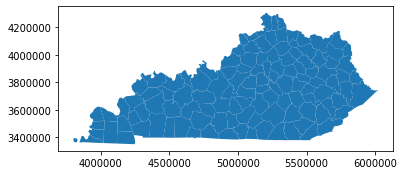

In [56]:
shapefile_small.plot()

In [57]:
shapefile_small = shapefile_small.rename(columns={'NAME2': 'County'})
shapefile_small.head()

,County,geometry
0,Greenup,"POLYGON ((5696927.000649408 4163203.493118197,..."
1,Mason,"POLYGON ((5447610.998016492 4172645.258631453,..."
2,Carroll,"POLYGON ((5040176.500135705 4156066.247712791,..."
3,Lewis,"POLYGON ((5692349.492746815 4154522.004764766,..."
4,Trimble,"POLYGON ((5040176.500135705 4156066.247712791,..."


In [64]:
ky_debt_pop_shape_df = pd.merge(ky_debt_pop_df,shapefile_small, on=['County'], how ='inner')
ky_debt_pop_shape_df

,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017,geometry
0,Adair,Kentucky,0.41,1636.0,0.29,767.0,0.06,0.15,0.14,0.27,45573,45942,38559,19294.0,"POLYGON ((5091332.504490286 3637133.24552922, ..."
1,Allen,Kentucky,0.41,2198.0,0.35,1200.0,0.04,0.16,0.16,0.28,52779,51598,88920,20921.0,"POLYGON ((4807035.996361256 3493719.995950386,..."
2,Anderson,Kentucky,0.32,1119.0,0.24,744.0,0.06,0.09,0.09,0.06,61426,61528,58865,22518.0,"POLYGON ((5130153.999390408 3935494.758557647,..."
3,Ballard,Kentucky,0.32,1295.0,0.23,623.0,0.07,0.12,0.12,0.21,58182,59729,30831,8021.0,"POLYGON ((4025485.747941986 3521587.750047788,..."
4,Barren,Kentucky,0.41,1477.0,0.29,781.0,0.09,0.13,0.13,0.15,49555,50043,43486,43815.0,"POLYGON ((4922934.002443656 3585414.001578286,..."
5,Bath,Kentucky,0.54,1012.0,0.44,466.0,0.04,0.13,0.13,0.20,48853,49679,25529,12378.0,"POLYGON ((5430491.508193895 3962484.247567341,..."
6,Bell,Kentucky,0.56,1030.0,0.37,545.0,0.05,0.14,0.14,0.12,32781,33003,28357,26904.0,"POLYGON ((5576158.994258568 3509058.496607304,..."
7,Boone,Kentucky,0.28,1410.0,0.13,390.0,0.11,0.06,0.04,0.22,88538,87799,96049,130611.0,"POLYGON ((5241034.008138925 4280889.491656229,..."
8,Bourbon,Kentucky,0.41,1248.0,0.32,592.0,0.15,0.13,0.11,0.25,58199,60702,39777,20132.0,"POLYGON ((5326891.997147262 3998090.497022852,..."
9,Boyd,Kentucky,0.52,1708.0,0.43,790.0,0.06,0.12,0.11,0.26,63743,62881,88023,47759.0,"POLYGON ((5761807.492436513 4037066.25689292, ..."


In [59]:
ky_bankruptcy_data = pd.read_excel('./data/ky_bankruptcy.xlsx', sheet_name="ky - bankruptcy -county")
ky_bankruptcy_data.head()

,County,all chapters_non_business,non_business_chapter_7,non_business_chapter_13
0,ADAIR,58,48,10
1,ALLEN,73,55,18
2,ANDERSON,98,49,49
3,BALLARD,24,14,10
4,BARREN,139,98,41


In [60]:
ky_bankruptcy_data['County'] = ky_bankruptcy_data['County'].str.capitalize()
ky_bankruptcy_data

,County,all chapters_non_business,non_business_chapter_7,non_business_chapter_13
0,Adair,58,48,10
1,Allen,73,55,18
2,Anderson,98,49,49
3,Ballard,24,14,10
4,Barren,139,98,41
5,Bath,21,14,7
6,Bell,69,52,17
7,Boone,427,257,170
8,Bourbon,69,45,24
9,Boyd,103,71,32


In [65]:
ky_debt_pop_shape_bankruptcy_df = pd.merge(ky_debt_pop_shape_df,ky_bankruptcy_data, on=['County'], how ='inner')
ky_debt_pop_shape_bankruptcy_df

,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017,geometry,all chapters_non_business,non_business_chapter_7,non_business_chapter_13
0,Adair,Kentucky,0.41,1636.0,0.29,767.0,0.06,0.15,0.14,0.27,45573,45942,38559,19294.0,"POLYGON ((5091332.504490286 3637133.24552922, ...",58,48,10
1,Allen,Kentucky,0.41,2198.0,0.35,1200.0,0.04,0.16,0.16,0.28,52779,51598,88920,20921.0,"POLYGON ((4807035.996361256 3493719.995950386,...",73,55,18
2,Anderson,Kentucky,0.32,1119.0,0.24,744.0,0.06,0.09,0.09,0.06,61426,61528,58865,22518.0,"POLYGON ((5130153.999390408 3935494.758557647,...",98,49,49
3,Ballard,Kentucky,0.32,1295.0,0.23,623.0,0.07,0.12,0.12,0.21,58182,59729,30831,8021.0,"POLYGON ((4025485.747941986 3521587.750047788,...",24,14,10
4,Barren,Kentucky,0.41,1477.0,0.29,781.0,0.09,0.13,0.13,0.15,49555,50043,43486,43815.0,"POLYGON ((4922934.002443656 3585414.001578286,...",139,98,41
5,Bath,Kentucky,0.54,1012.0,0.44,466.0,0.04,0.13,0.13,0.20,48853,49679,25529,12378.0,"POLYGON ((5430491.508193895 3962484.247567341,...",21,14,7
6,Bell,Kentucky,0.56,1030.0,0.37,545.0,0.05,0.14,0.14,0.12,32781,33003,28357,26904.0,"POLYGON ((5576158.994258568 3509058.496607304,...",69,52,17
7,Boone,Kentucky,0.28,1410.0,0.13,390.0,0.11,0.06,0.04,0.22,88538,87799,96049,130611.0,"POLYGON ((5241034.008138925 4280889.491656229,...",427,257,170
8,Bourbon,Kentucky,0.41,1248.0,0.32,592.0,0.15,0.13,0.11,0.25,58199,60702,39777,20132.0,"POLYGON ((5326891.997147262 3998090.497022852,...",69,45,24
9,Boyd,Kentucky,0.52,1708.0,0.43,790.0,0.06,0.12,0.11,0.26,63743,62881,88023,47759.0,"POLYGON ((5761807.492436513 4037066.25689292, ...",103,71,32


In [66]:
ky_debt_pop_shape_bankruptcy_df.corr()

,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017,all chapters_non_business,non_business_chapter_7,non_business_chapter_13
pct_debt_in_coll,1.000000,0.026881,0.855878,0.055384,-0.224063,0.409448,0.427232,-0.011259,-0.596804,-0.590314,-0.179884,-0.121830,-0.095095,-0.086760,-0.103394
median_debt_in_coll,0.026881,1.000000,0.136102,0.552063,0.094966,0.066340,0.038000,-0.013062,0.052841,0.049038,0.033546,0.003458,0.000295,0.006066,-0.006705
pct_med_debt_in_coll,0.855878,0.136102,1.000000,0.158799,-0.220822,0.395969,0.413797,-0.013939,-0.465259,-0.462672,-0.155389,-0.131198,-0.116162,-0.110716,-0.120570
median_med_debt_in_coll,0.055384,0.552063,0.158799,1.000000,0.222855,0.066346,-0.001646,0.090453,-0.002890,0.021464,-0.108166,0.039815,0.033633,0.037173,0.028672
pct_pop_nonwhite,-0.224063,0.094966,-0.220822,0.222855,1.000000,-0.294409,-0.394996,-0.056580,0.408608,0.480251,0.019408,0.533046,0.486210,0.490307,0.471888
pct_overall_no_ins,0.409448,0.066340,0.395969,0.066346,-0.294409,1.000000,0.965471,0.269753,-0.574271,-0.574152,-0.335536,-0.433959,-0.400255,-0.417585,-0.371621
pct_white_no_ins,0.427232,0.038000,0.413797,-0.001646,-0.394996,0.965471,1.000000,0.112198,-0.630567,-0.638979,-0.313156,-0.449330,-0.408468,-0.425390,-0.380176
pct_nonwhite_no_ins,-0.011259,-0.013062,-0.013939,0.090453,-0.056580,0.269753,0.112198,1.000000,-0.051705,-0.054074,0.000894,-0.154296,-0.153709,-0.157863,-0.145727
avg_income,-0.596804,0.052841,-0.465259,-0.002890,0.408608,-0.574271,-0.630567,-0.051705,1.000000,0.993660,0.427263,0.382588,0.322130,0.326003,0.311294
avg_income_white,-0.590314,0.049038,-0.462672,0.021464,0.480251,-0.574152,-0.638979,-0.054074,0.993660,1.000000,0.362890,0.434892,0.370435,0.374246,0.358737


## Overall data: Keeping the columns we need

In [113]:
ky_debt_pop_shape_bankruptcy_df_small =ky_debt_pop_shape_bankruptcy_df[['County','pct_debt_in_coll', 'median_debt_in_coll', 'pct_med_debt_in_coll',
                                 'median_med_debt_in_coll', 'pct_overall_no_ins', 'avg_income', 'pop_2017','all chapters_non_business', 'non_business_chapter_7', 'non_business_chapter_13'  ]]


ky_debt_pop_shape_bankruptcy_df_small

,County,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_overall_no_ins,avg_income,pop_2017,all chapters_non_business,non_business_chapter_7,non_business_chapter_13
0,Adair,0.41,1636.0,0.29,767.0,0.15,45573,19294.0,58,48,10
1,Allen,0.41,2198.0,0.35,1200.0,0.16,52779,20921.0,73,55,18
2,Anderson,0.32,1119.0,0.24,744.0,0.09,61426,22518.0,98,49,49
3,Ballard,0.32,1295.0,0.23,623.0,0.12,58182,8021.0,24,14,10
4,Barren,0.41,1477.0,0.29,781.0,0.13,49555,43815.0,139,98,41
5,Bath,0.54,1012.0,0.44,466.0,0.13,48853,12378.0,21,14,7
6,Bell,0.56,1030.0,0.37,545.0,0.14,32781,26904.0,69,52,17
7,Boone,0.28,1410.0,0.13,390.0,0.06,88538,130611.0,427,257,170
8,Bourbon,0.41,1248.0,0.32,592.0,0.13,58199,20132.0,69,45,24
9,Boyd,0.52,1708.0,0.43,790.0,0.12,63743,47759.0,103,71,32


### overall data: add a column for the percent of county with insurance

In [114]:
ky_debt_pop_shape_bankruptcy_df_small['pct_overall_with_ins'] = 1- (ky_debt_pop_shape_bankruptcy_df_small['pct_overall_no_ins'])
ky_debt_pop_shape_bankruptcy_df_small.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,County,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_overall_no_ins,avg_income,pop_2017,all chapters_non_business,non_business_chapter_7,non_business_chapter_13,pct_overall_with_ins
0,Adair,0.41,1636.0,0.29,767.0,0.15,45573,19294.0,58,48,10,0.85
1,Allen,0.41,2198.0,0.35,1200.0,0.16,52779,20921.0,73,55,18,0.84
2,Anderson,0.32,1119.0,0.24,744.0,0.09,61426,22518.0,98,49,49,0.91
3,Ballard,0.32,1295.0,0.23,623.0,0.12,58182,8021.0,24,14,10,0.88
4,Barren,0.41,1477.0,0.29,781.0,0.13,49555,43815.0,139,98,41,0.87


### overall data:  add a column for the percent of bankruptcies in county

In [115]:
ky_debt_pop_shape_bankruptcy_df_small['pct_of_bankruptcies'] = ky_debt_pop_shape_bankruptcy_df_small['all chapters_non_business']/ky_debt_pop_shape_bankruptcy_df_small['pop_2017']
ky_debt_pop_shape_bankruptcy_df_small.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,County,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_overall_no_ins,avg_income,pop_2017,all chapters_non_business,non_business_chapter_7,non_business_chapter_13,pct_overall_with_ins,pct_of_bankruptcies
0,Adair,0.41,1636.0,0.29,767.0,0.15,45573,19294.0,58,48,10,0.85,0.003006
1,Allen,0.41,2198.0,0.35,1200.0,0.16,52779,20921.0,73,55,18,0.84,0.003489
2,Anderson,0.32,1119.0,0.24,744.0,0.09,61426,22518.0,98,49,49,0.91,0.004352
3,Ballard,0.32,1295.0,0.23,623.0,0.12,58182,8021.0,24,14,10,0.88,0.002992
4,Barren,0.41,1477.0,0.29,781.0,0.13,49555,43815.0,139,98,41,0.87,0.003172


### overall data: a look at correlation matrix for moderate pos and neg correlations (.4 or -.4)

In [116]:
ky_debt_pop_shape_bankruptcy_df_small.corr()
ky_debt_pop_shape_bankruptcy_df_small_corr = ky_debt_pop_shape_bankruptcy_df_small.corr()
def red(val):
    color = 'red' if val >= .4 or val <= -.4 else 'black'
    return 'color: %s' % color
ky_debt_pop_shape_bankruptcy_df_small_corr.style.applymap(red)

,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_overall_no_ins,avg_income,pop_2017,all chapters_non_business,non_business_chapter_7,non_business_chapter_13,pct_overall_with_ins,pct_of_bankruptcies
pct_debt_in_coll,1,0.0268808,0.855878,0.0553842,0.409448,-0.596804,-0.12183,-0.0950954,-0.0867598,-0.103394,-0.409448,0.127739
median_debt_in_coll,0.0268808,1,0.136102,0.552063,0.0663398,0.0528414,0.00345846,0.000295075,0.0060664,-0.00670503,-0.0663398,-0.0793994
pct_med_debt_in_coll,0.855878,0.136102,1,0.158799,0.395969,-0.465259,-0.131198,-0.116162,-0.110716,-0.12057,-0.395969,-0.0595902
median_med_debt_in_coll,0.0553842,0.552063,0.158799,1,0.0663464,-0.00289002,0.0398149,0.0336332,0.037173,0.0286717,-0.0663464,-0.0566289
pct_overall_no_ins,0.409448,0.0663398,0.395969,0.0663464,1,-0.574271,-0.433959,-0.400255,-0.417585,-0.371621,-1,0.0209936
avg_income,-0.596804,0.0528414,-0.465259,-0.00289002,-0.574271,1,0.382588,0.32213,0.326003,0.311294,0.574271,-0.217311
pop_2017,-0.12183,0.00345846,-0.131198,0.0398149,-0.433959,0.382588,1,0.984917,0.984489,0.966359,0.433959,0.0126379
all chapters_non_business,-0.0950954,0.000295075,-0.116162,0.0336332,-0.400255,0.32213,0.984917,1,0.992754,0.989387,0.400255,0.10879
non_business_chapter_7,-0.0867598,0.0060664,-0.110716,0.037173,-0.417585,0.326003,0.984489,0.992754,1,0.964758,0.417585,0.125651
non_business_chapter_13,-0.103394,-0.00670503,-0.12057,0.0286717,-0.371621,0.311294,0.966359,0.989387,0.964758,1,0.371621,0.0863084


### overall data: plotting 

Text(0.5, 1.0, 'All income levels pct_debt_in_coll vs pct_med_debt_in_coll corr .85')

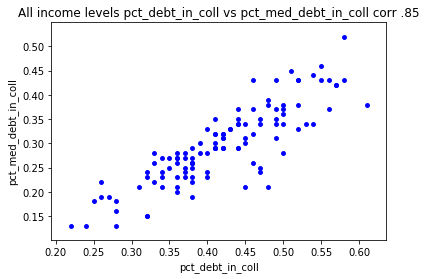

In [117]:
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['pct_debt_in_coll'], ky_debt_pop_shape_bankruptcy_df_small['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_debt_in_coll')
plt.ylabel('pct_med_debt_in_coll')
plt.title('All income levels pct_debt_in_coll vs pct_med_debt_in_coll corr .85')

#### So, a significant amount of people who have debt in collections have medical debt in collections.

Text(0.5, 1.0, 'All income levels pct_overall_with_ins vs pct_med_debt_in_coll corr -.39')

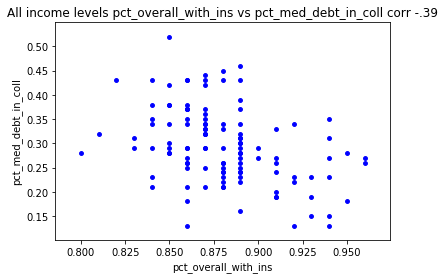

In [118]:
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['pct_overall_with_ins'], ky_debt_pop_shape_bankruptcy_df_small['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_overall_with_ins')
plt.ylabel('pct_med_debt_in_coll')
plt.title('All income levels pct_overall_with_ins vs pct_med_debt_in_coll corr -.39')

#### The above negative correlation between percent of med debt in collections and the percent of county with insurance is -.39. I would expect this number to be higher, i.e. a stronger relationship of the following: as the percent of medical debt in collections decreases, the percent of people with insurance increases. I.e. insurance is a protective factor from unmanageable medical debt. 

Text(0.5, 1.0, 'All income levels avg_income vs pct_med_debt_in_coll corr -.46')

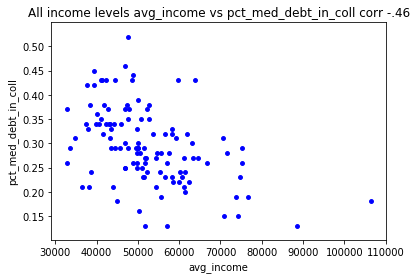

In [119]:
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['avg_income'], ky_debt_pop_shape_bankruptcy_df_small['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('avg_income')
plt.ylabel('pct_med_debt_in_coll')
plt.title('All income levels avg_income vs pct_med_debt_in_coll corr -.46')

#### The above indicates a negative correlation between percent of county with medical debt in collection and average income. I.e. the higher a county's income, the less number of people in that county have medical debt in collections. Makes sense.

Text(0.5, 1.0, 'All income levels Population 2017 vs pct_of county with no insurance -.43')

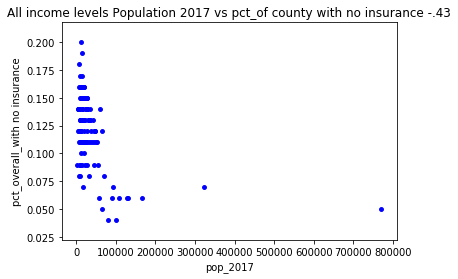

In [120]:
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['pop_2017'], ky_debt_pop_shape_bankruptcy_df_small['pct_overall_no_ins'], color = "blue", s= 15)
plt.xlabel('pop_2017')
plt.ylabel('pct_overall_with no insurance')
plt.title('All income levels Population 2017 vs pct_of county with no insurance -.43')

#### now without outiers

(0, 200000)

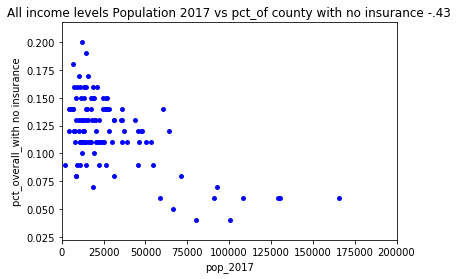

In [121]:
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['pop_2017'], ky_debt_pop_shape_bankruptcy_df_small['pct_overall_no_ins'], color = "blue", s= 15)
plt.xlabel('pop_2017')
plt.ylabel('pct_overall_with no insurance')
plt.title('All income levels Population 2017 vs pct_of county with no insurance -.43')
plt.xlim(0,200000)

#### So there is a moderate negative correlation between the percent of county without insurance and the population, i.e. in more sparsely populated counties you will find more people without insurance. 

Text(0.5, 1.0, 'All income levels Pct of county with medical debt in collection vs pct of personal bankruptcies in the county -.05')

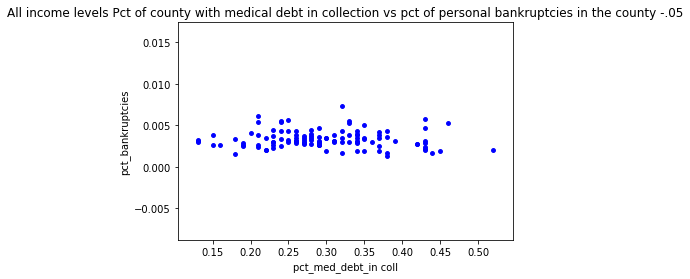

In [135]:
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['pct_med_debt_in_coll'], ky_debt_pop_shape_bankruptcy_df_small['pct_of_bankruptcies'], color = "blue", s= 15)
plt.xlabel('pct_med_debt_in coll')
plt.ylabel('pct_bankruptcies')
plt.title('All income levels Pct of county with medical debt in collection vs pct of personal bankruptcies in the county -.05')


#### Looking at all income levels, there is no correlation between the percent of the county with medical debt in collections and percent of bankruptcies in a county. 

Text(0.5, 1.0, 'bankruptcies all chapters_non_business vs pct_overall_with_ins .40')

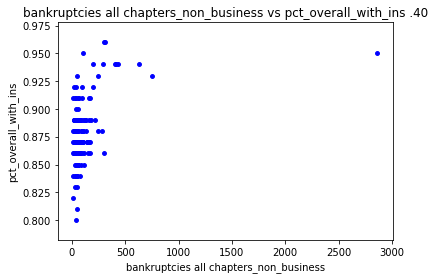

In [123]:
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['all chapters_non_business'], ky_debt_pop_shape_bankruptcy_df_small['pct_overall_with_ins'], color = "blue", s= 15)
plt.xlabel('bankruptcies all chapters_non_business')
plt.ylabel('pct_overall_with_ins')
plt.title('bankruptcies all chapters_non_business vs pct_overall_with_ins .40')

#### now without outiers

(0, 750)

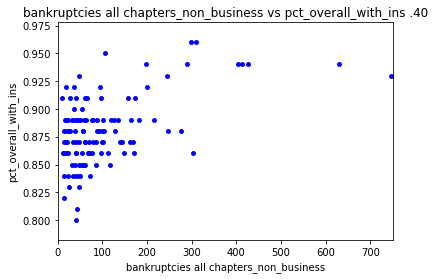

In [124]:
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['all chapters_non_business'], ky_debt_pop_shape_bankruptcy_df_small['pct_overall_with_ins'], color = "blue", s= 15)
plt.xlabel('bankruptcies all chapters_non_business')
plt.ylabel('pct_overall_with_ins')
plt.title('bankruptcies all chapters_non_business vs pct_overall_with_ins .40')
plt.xlim(0,750)

#### not sure how much I can conclude from the above. There is a moderate correlation between the number of bankruptcies in a county and percentage of people with insurance. This could mean that people with insurance have the money to file for bankruptcy?

### Looking at correlations within low, middle and high income levels

#### First find the income percentiles 

In [125]:
ky_debt_pop_shape_bankruptcy_df_small.describe()

,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_overall_no_ins,avg_income,pop_2017,all chapters_non_business,non_business_chapter_7,non_business_chapter_13,pct_overall_with_ins,pct_of_bankruptcies
count,116.000000,117.000000,116.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,0.418017,1341.623932,0.295776,654.521368,0.119231,52101.846154,37280.641026,125.880342,81.854701,44.017094,0.880769,0.003349
std,0.082738,354.382068,0.078863,199.455362,0.031600,11755.883341,78667.091107,280.603941,155.011193,127.990165,0.031600,0.001052
min,0.220000,713.000000,0.130000,284.000000,0.040000,32719.000000,2132.000000,9.000000,4.000000,1.000000,0.800000,0.001305
25%,0.360000,1139.000000,0.240000,545.000000,0.110000,43717.000000,12248.000000,38.000000,26.000000,10.000000,0.860000,0.002732
50%,0.410000,1295.000000,0.290000,623.000000,0.120000,50071.000000,19294.000000,61.000000,45.000000,19.000000,0.880000,0.003149
75%,0.480000,1477.000000,0.340000,744.000000,0.140000,58199.000000,35491.000000,120.000000,88.000000,36.000000,0.890000,0.003865
max,0.610000,2905.000000,0.520000,1644.000000,0.200000,106471.000000,770377.000000,2864.000000,1519.000000,1344.000000,0.960000,0.007300


#### create dataframe for low income: below 25% (43717)

In [126]:
bottom_income_ky_debt_pop_shape_bankruptcy_df = ky_debt_pop_shape_bankruptcy_df_small.loc[ky_debt_pop_shape_bankruptcy_df_small.avg_income < 43717] # avg income less than 25%
bottom_income_ky_debt_pop_shape_bankruptcy_df.reset_index(drop=True)

,County,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_overall_no_ins,avg_income,pop_2017,all chapters_non_business,non_business_chapter_7,non_business_chapter_13,pct_overall_with_ins,pct_of_bankruptcies
0,Bell,0.56,1030.0,0.37,545.0,0.14,32781,26904.0,69,52,17,0.86,0.002565
1,Breathitt,0.45,916.0,0.21,623.0,0.13,38128,12931.0,80,51,29,0.87,0.006187
2,Butler,0.43,1249.0,0.33,784.0,0.12,43381,12798.0,38,31,7,0.88,0.002969
3,Casey,0.45,787.0,0.31,438.0,0.17,43192,15794.0,47,36,11,0.83,0.002976
4,Clay,0.49,1055.0,0.31,430.0,0.11,34745,20273.0,79,54,25,0.89,0.003897
5,Clinton,0.44,1031.0,0.35,661.0,0.13,41050,10239.0,19,17,2,0.87,0.001856
6,Cumberland,0.46,1087.0,0.43,580.0,0.18,41349,6696.0,14,12,2,0.82,0.002091
7,Elliott,0.51,1295.0,0.45,623.0,0.12,39390,7508.0,14,13,1,0.88,0.001865
8,Estill,0.50,1108.0,0.36,591.0,0.13,40072,14227.0,42,29,13,0.87,0.002952
9,Fulton,0.53,998.0,0.34,623.0,0.14,42169,6204.0,12,5,7,0.86,0.001934


#### find correlation for bottom income group

In [127]:
bottom_income_ky_debt_pop_shape_bankruptcy_df.corr()

bottom_income_ky_debt_pop_shape_bankruptcy_df_corr = bottom_income_ky_debt_pop_shape_bankruptcy_df.corr()
def red(val):
    color = 'red' if val >= .4 or val <= -.4 else 'black'
    return 'color: %s' % color
bottom_income_ky_debt_pop_shape_bankruptcy_df_corr.style.applymap(red)

,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_overall_no_ins,avg_income,pop_2017,all chapters_non_business,non_business_chapter_7,non_business_chapter_13,pct_overall_with_ins,pct_of_bankruptcies
pct_debt_in_coll,1,0.276048,0.547878,0.248498,-0.158789,-0.123807,0.163106,0.0276673,0.0492113,-0.0326825,0.158789,-0.162266
median_debt_in_coll,0.276048,1,0.310892,0.317058,-0.0205826,-0.0276227,-0.119014,-0.0943057,-0.0529938,-0.198297,0.0205826,-0.0486821
pct_med_debt_in_coll,0.547878,0.310892,1,0.175171,0.153208,0.290019,0.0764413,-0.155751,-0.0925942,-0.313808,-0.153208,-0.536638
median_med_debt_in_coll,0.248498,0.317058,0.175171,1,0.00630283,0.084096,-0.138054,-0.151537,-0.134523,-0.185391,-0.00630283,-0.0628263
pct_overall_no_ins,-0.158789,-0.0205826,0.153208,0.00630283,1,0.186157,-0.0451636,-0.0999057,-0.0784651,-0.149818,-1,-0.181088
avg_income,-0.123807,-0.0276227,0.290019,0.084096,0.186157,1,-0.167773,-0.155605,-0.131636,-0.207908,-0.186157,-0.23004
pop_2017,0.163106,-0.119014,0.0764413,-0.138054,-0.0451636,-0.167773,1,0.86169,0.880298,0.742854,0.0451636,0.414445
all chapters_non_business,0.0276673,-0.0943057,-0.155751,-0.151537,-0.0999057,-0.155605,0.86169,1,0.992174,0.9415,0.0999057,0.774534
non_business_chapter_7,0.0492113,-0.0529938,-0.0925942,-0.134523,-0.0784651,-0.131636,0.880298,0.992174,1,0.892049,0.0784651,0.720712
non_business_chapter_13,-0.0326825,-0.198297,-0.313808,-0.185391,-0.149818,-0.207908,0.742854,0.9415,0.892049,1,0.149818,0.858125


Text(0.5, 1.0, 'Lower income level less than 43717: income level pct_debt_in_coll vs pct_med_debt_in_coll corr .54')

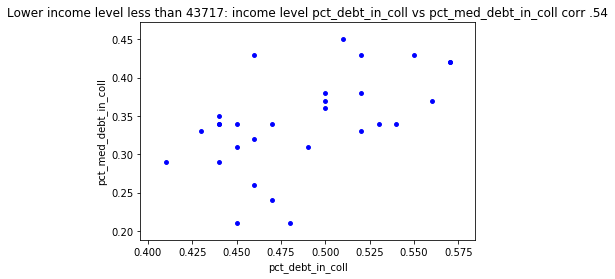

In [128]:
plt.scatter(bottom_income_ky_debt_pop_shape_bankruptcy_df['pct_debt_in_coll'], bottom_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_debt_in_coll')
plt.ylabel('pct_med_debt_in_coll')
plt.title('Lower income level less than 43717: income level pct_debt_in_coll vs pct_med_debt_in_coll corr .54')

#### Relative to all income levells, with lower income segment, there is a weaker correlation between percent of the county with debt in collections and percent with medical debt in collections. 

Text(0.5, 1.0, 'Low income level pct_overall_with_ins vs pct_med_debt_in_coll corr -.15')

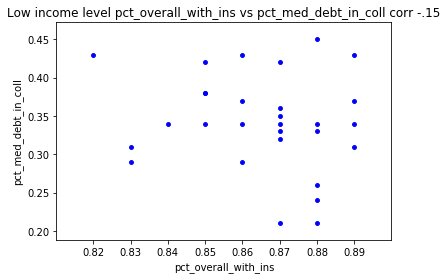

In [151]:
plt.scatter(bottom_income_ky_debt_pop_shape_bankruptcy_df['pct_overall_with_ins'], bottom_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_overall_with_ins')
plt.ylabel('pct_med_debt_in_coll')
plt.title('Low income level pct_overall_with_ins vs pct_med_debt_in_coll corr -.15')

#### According to the above, for lower income segment, there is no correlation between the percent of the county with insurance and the percent of the county with medical debt in collections. This is different from overall where you see  a -.39

(0, 0.01)

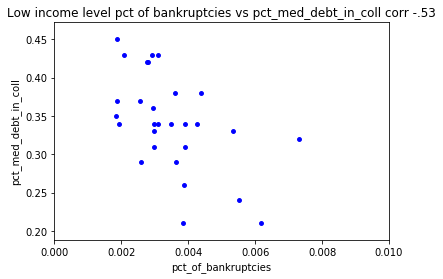

In [132]:
plt.scatter(bottom_income_ky_debt_pop_shape_bankruptcy_df['pct_of_bankruptcies'], bottom_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_of_bankruptcies')
plt.ylabel('pct_med_debt_in_coll')
plt.title('Low income level pct of bankruptcies vs pct_med_debt_in_coll corr -.53')
plt.xlim(0,.01)

#### According to the above, for lower income segment, there is a moderate negative correlation between the percentage of bankruptcies in a county and the percent of the coutny with medical debt in collections. Possibly because lower income levels are less likely to have the money to file for bankruptcy. This is different from all income levels where there was no correlation between the percent of the county with medical debt in collections and percent of bankruptcies in a county.

### A look at middle incomes

In [146]:
middle_income_ky_debt_pop_shape_bankruptcy_df = ky_debt_pop_shape_bankruptcy_df_small[(ky_debt_pop_shape_bankruptcy_df_small.avg_income >= 43717) & (ky_debt_pop_shape_bankruptcy_df_small.avg_income < 58199)] # avg income between 25% and 75%
middle_income_ky_debt_pop_shape_bankruptcy_df.reset_index(drop=True)


,County,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_overall_no_ins,avg_income,pop_2017,all chapters_non_business,non_business_chapter_7,non_business_chapter_13,pct_overall_with_ins,pct_of_bankruptcies
0,Adair,0.41,1636.0,0.29,767.0,0.15,45573,19294.0,58,48,10,0.85,0.003006
1,Allen,0.41,2198.0,0.35,1200.0,0.16,52779,20921.0,73,55,18,0.84,0.003489
2,Ballard,0.32,1295.0,0.23,623.0,0.12,58182,8021.0,24,14,10,0.88,0.002992
3,Barren,0.41,1477.0,0.29,781.0,0.13,49555,43815.0,139,98,41,0.87,0.003172
4,Bath,0.54,1012.0,0.44,466.0,0.13,48853,12378.0,21,14,7,0.87,0.001697
5,Boyle,0.40,1208.0,0.23,321.0,0.11,56462,29958.0,89,66,23,0.89,0.002971
6,Bracken,0.34,1727.0,0.23,623.0,0.08,51316,8277.0,37,18,19,0.92,0.004470
7,Breckinridge,0.42,1333.0,0.29,472.0,0.13,51480,20151.0,61,45,16,0.87,0.003027
8,Caldwell,0.41,1677.0,0.29,642.0,0.11,50042,12677.0,35,23,12,0.89,0.002761
9,Calloway,0.28,922.0,0.16,680.0,0.11,50310,38865.0,101,73,28,0.89,0.002599


In [139]:
middle_income_ky_debt_pop_shape_bankruptcy_df.corr()
middle_income_ky_debt_pop_shape_bankruptcy_df_corr = middle_income_ky_debt_pop_shape_bankruptcy_df.corr()
def red(val):
    color = 'red' if val >= .4 or val <= -.4 else 'black'
    return 'color: %s' % color
middle_income_ky_debt_pop_shape_bankruptcy_df_corr.style.applymap(red)

,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_overall_no_ins,avg_income,pop_2017,all chapters_non_business,non_business_chapter_7,non_business_chapter_13,pct_overall_with_ins,pct_of_bankruptcies
pct_debt_in_coll,1,-0.0380561,0.891915,-0.00608768,0.198042,-0.34949,0.133469,0.154531,0.180482,0.0622455,-0.198042,0.127462
median_debt_in_coll,-0.0380561,1,0.0748671,0.583909,0.0719249,0.206727,-0.0502322,-0.0805991,-0.0581566,-0.115519,-0.0719249,-0.103639
pct_med_debt_in_coll,0.891915,0.0748671,1,0.103314,0.225666,-0.358066,0.103112,0.0922469,0.135173,-0.0258573,-0.225666,0.0377061
median_med_debt_in_coll,-0.00608768,0.583909,0.103314,1,0.0693067,0.0130505,0.0291902,-0.0310001,0.00912936,-0.116932,-0.0693067,-0.105317
pct_overall_no_ins,0.198042,0.0719249,0.225666,0.0693067,1,-0.138859,-0.272431,-0.198243,-0.152753,-0.261783,-1,-0.0217156
avg_income,-0.34949,0.206727,-0.358066,0.0130505,-0.138859,1,-0.14388,-0.148324,-0.157592,-0.0961886,0.138859,-0.16225
pop_2017,0.133469,-0.0502322,0.103112,0.0291902,-0.272431,-0.14388,1,0.910447,0.885617,0.778529,0.272431,0.169022
all chapters_non_business,0.154531,-0.0805991,0.0922469,-0.0310001,-0.198243,-0.148324,0.910447,1,0.973869,0.85248,0.198243,0.495852
non_business_chapter_7,0.180482,-0.0581566,0.135173,0.00912936,-0.152753,-0.157592,0.885617,0.973869,1,0.711479,0.152753,0.45276
non_business_chapter_13,0.0622455,-0.115519,-0.0258573,-0.116932,-0.261783,-0.0961886,0.778529,0.85248,0.711479,1,0.261783,0.492068


Text(0.5, 1.0, 'Mid income level pct of people with debt in collections vs pct of people with medical debt in collections .89')

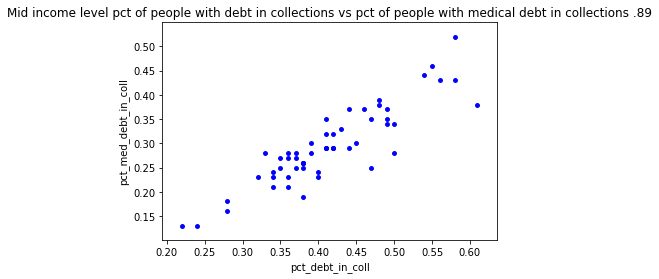

In [140]:
plt.scatter(middle_income_ky_debt_pop_shape_bankruptcy_df['pct_debt_in_coll'], middle_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_debt_in_coll')
plt.ylabel('pct_med_debt_in_coll')
plt.title('Mid income level pct of people with debt in collections vs pct of people with medical debt in collections .89')

#### Within the middle income group, there is a stronger correlation compared to the low income group, between percent of people with debt in collections and the percent of people with medical debt in collections. 

Text(0.5, 1.0, 'Mid income level pct of people with insurance vs pct of people with medical debt in collections -.22')

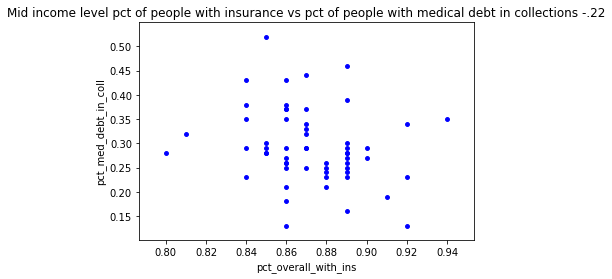

In [141]:
plt.scatter(middle_income_ky_debt_pop_shape_bankruptcy_df['pct_overall_with_ins'], middle_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_overall_with_ins')
plt.ylabel('pct_med_debt_in_coll')
plt.title('Mid income level pct of people with insurance vs pct of people with medical debt in collections -.22')

#### Similar to the low income group (-.39 corr), there is no correlation between the percent of people with insurance and the percent of people with medical debt in collections (-.22).

Text(0.5, 1.0, 'Mid income level pct of bankruptcies vs pct of people with medical debt in collections -.03')

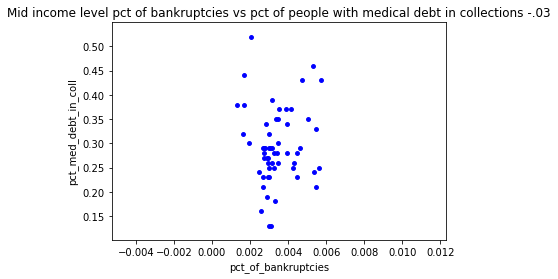

In [144]:
plt.scatter(middle_income_ky_debt_pop_shape_bankruptcy_df['pct_of_bankruptcies'], middle_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_of_bankruptcies')
plt.ylabel('pct_med_debt_in_coll')
plt.title('Mid income level pct of bankruptcies vs pct of people with medical debt in collections -.03')

#### This is interesting. Why at lower income level, the percent of bankruptcies and the percent of medical debt in collections, there a negative orrelation (-.53) but at the middle income levels, there is no correlation (-.03). Why?

### A look at top incomes

In [147]:
top_income_ky_debt_pop_shape_bankruptcy_df = ky_debt_pop_shape_bankruptcy_df_small.loc[ky_debt_pop_shape_bankruptcy_df_small.avg_income > 58199] # avg income above 75%
top_income_ky_debt_pop_shape_bankruptcy_df.reset_index(drop=True)


,County,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_overall_no_ins,avg_income,pop_2017,all chapters_non_business,non_business_chapter_7,non_business_chapter_13,pct_overall_with_ins,pct_of_bankruptcies
0,Anderson,0.32,1119.0,0.24,744.0,0.09,61426,22518.0,98,49,49,0.91,0.004352
1,Boone,0.28,1410.0,0.13,390.0,0.06,88538,130611.0,427,257,170,0.94,0.003269
2,Boyd,0.52,1708.0,0.43,790.0,0.12,63743,47759.0,103,71,32,0.88,0.002157
3,Bullitt,0.36,1320.0,0.27,674.0,0.04,61222,80284.0,298,176,122,0.96,0.003712
4,Campbell,0.32,1099.0,0.15,519.0,0.07,74290,92547.0,245,152,93,0.93,0.002647
5,Clark,0.41,1363.0,0.30,656.0,0.11,63223,35940.0,125,92,33,0.89,0.003478
6,Daviess,0.33,1444.0,0.26,593.0,0.04,66638,100546.0,309,223,86,0.96,0.003073
7,Fayette,0.37,1182.0,0.23,655.0,0.07,74766,322193.0,746,518,228,0.93,0.002315
8,Franklin,0.42,1605.0,0.32,741.0,0.11,61784,50504.0,216,121,95,0.89,0.004277
9,Greenup,0.49,1681.0,0.43,875.0,0.13,59689,35491.0,85,63,22,0.87,0.002395


In [148]:
top_income_ky_debt_pop_shape_bankruptcy_df.corr()
top_income_ky_debt_pop_shape_bankruptcy_df_corr = top_income_ky_debt_pop_shape_bankruptcy_df.corr()
def red(val):
    color = 'red' if val >= .4 or val <= -.4 else 'black'
    return 'color: %s' % color
top_income_ky_debt_pop_shape_bankruptcy_df_corr.style.applymap(red)

,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_overall_no_ins,avg_income,pop_2017,all chapters_non_business,non_business_chapter_7,non_business_chapter_13,pct_overall_with_ins,pct_of_bankruptcies
pct_debt_in_coll,1,0.522487,0.870051,0.671061,0.354321,-0.470272,0.11502,0.121359,0.133573,0.10558,-0.354321,0.208808
median_debt_in_coll,0.522487,1,0.508569,0.608385,0.18679,-0.125423,0.0653899,0.070244,0.0858969,0.0511052,-0.18679,-0.0836839
pct_med_debt_in_coll,0.870051,0.508569,1,0.719199,0.367612,-0.44782,-0.0209265,-0.00988325,-0.0129926,-0.00619119,-0.367612,0.0181193
median_med_debt_in_coll,0.671061,0.608385,0.719199,1,0.251875,-0.397681,0.110972,0.120412,0.114491,0.12578,-0.251875,0.188811
pct_overall_no_ins,0.354321,0.18679,0.367612,0.251875,1,-0.347735,-0.424009,-0.406251,-0.439582,-0.362388,-1,-0.145087
avg_income,-0.470272,-0.125423,-0.44782,-0.397681,-0.347735,1,0.189708,0.131558,0.128379,0.133682,0.347735,-0.391216
pop_2017,0.11502,0.0653899,-0.0209265,0.110972,-0.424009,0.189708,1,0.987178,0.99285,0.968334,0.424009,0.131161
all chapters_non_business,0.121359,0.070244,-0.00988325,0.120412,-0.406251,0.131558,0.987178,1,0.995096,0.993328,0.406251,0.213658
non_business_chapter_7,0.133573,0.0858969,-0.0129926,0.114491,-0.439582,0.128379,0.99285,0.995096,1,0.977049,0.439582,0.206591
non_business_chapter_13,0.10558,0.0511052,-0.00619119,0.12578,-0.362388,0.133682,0.968334,0.993328,0.977049,1,0.362388,0.21929


Text(0.5, 1.0, 'Top income level pct of county with debt in collections vs pct of county with medical debt in collections .87')

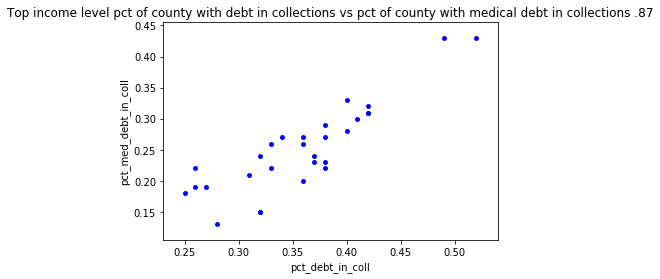

In [149]:
plt.scatter(top_income_ky_debt_pop_shape_bankruptcy_df['pct_debt_in_coll'], top_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_debt_in_coll')
plt.ylabel('pct_med_debt_in_coll')
plt.title('Top income level pct of county with debt in collections vs pct of county with medical debt in collections .87')

#### Within the top income group, there is a strong correlation between percent of people with debt in collections and the percent of people with medical debt in collections (.87). This strong correlation is consistent across income groups. 

Text(0.5, 1.0, 'Top income level pct of county with debt in collections vs pct of county with medical debt in collections -.36')

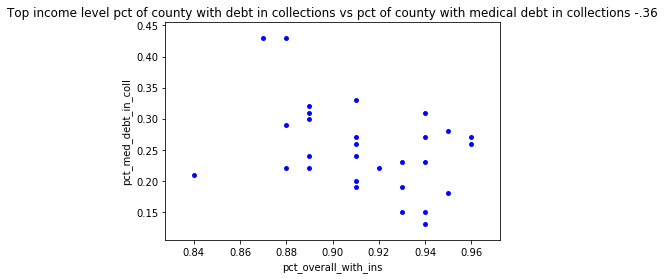

In [150]:
plt.scatter(top_income_ky_debt_pop_shape_bankruptcy_df['pct_overall_with_ins'], top_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_overall_with_ins')
plt.ylabel('pct_med_debt_in_coll')
plt.title('Top income level pct of county with insurance vs pct of county with medical debt in collections -.36')

#### The low income group (-.15 corr) has no/low correlation compared to the middle income group (-.39 corr), and the high income group (-.36).

Text(0.5, 1.0, 'Top income level pct of county with insurance vs pct of personal bankruptcies in county .14')

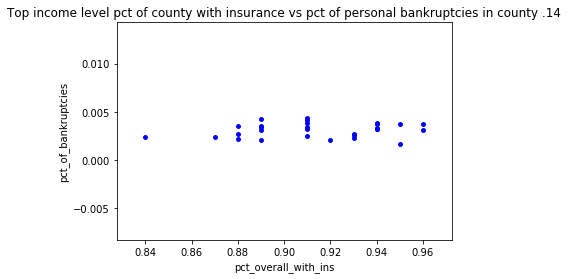

In [157]:
plt.scatter(top_income_ky_debt_pop_shape_bankruptcy_df['pct_overall_with_ins'], top_income_ky_debt_pop_shape_bankruptcy_df['pct_of_bankruptcies'], color = "blue", s= 15)
plt.xlabel('pct_overall_with_ins')
plt.ylabel('pct_of_bankruptcies')
plt.title('Top income level pct of county with insurance vs pct of personal bankruptcies in county .14')


#### At top income level there is no correlation between the percent ofthe county with insurance and the percent of bankruptcies in the county. 

Text(0.5, 1.0, 'Top income level pct of bankruptcies in coutny vs pct of medical debt in collections .01')

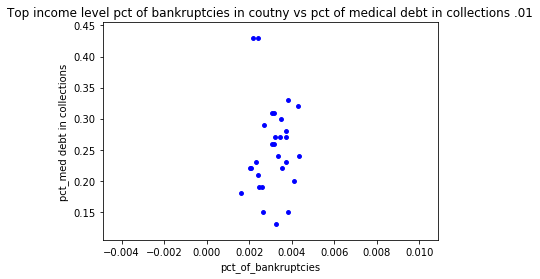

In [159]:
plt.scatter(top_income_ky_debt_pop_shape_bankruptcy_df['pct_of_bankruptcies'], top_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_of_bankruptcies')
plt.ylabel('pct_med debt in collections')
plt.title('Top income level pct of bankruptcies in coutny vs pct of medical debt in collections .01')

#### At top income level there is no correlation between the percent of bankruptcies and the percent ofmedical debt in collections in the county.



